### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# 

# Assignment activity 1

### Plan your approach

- First, I will rewrite the assessment scenario in my own words to clearly define the main objective, which is to determine whether there has been adequate staffing capacity across the networks and to assess the actual utilisation of resources. 
- I will then review the metadata for all datasets to understand the context behind the data, including explanations for why the data appears as it does, any missing or inconsistent data, the relationships between datasets and any assumptions that need to be made. This will help ensure that my analysis is accurate and based on a clear understanding of the data. I will annotate key details from the metadata, noting important variables, categories and how different datasets connect to each other. 
- Using the key questions provided in the assessment as a foundation, I will develop additional questions that relate back to the main objective and could reveal further insights. 
- Once this groundwork is complete, I will import and clean all datasets, merge them into structured data frames and prepare them for analysis. 
- I will then systematically address each question in the assessment checklist and build upon my analysis depending on the insights that emerge.
- Finally, I will use the findings to form evidence-based recommendations for improving staffing capacity, resource utilisation and overall service efficiency in both the short and long term.

<span style="color:brown"><b>Note: I have saved the presentation figures as fig followed by a number, while additional analysis figures are named 'fig_explore'. This allows for quick cross-referencing between the report and this notebook. The figure numbering is not sequential because the narrative and insights evolved during analysis, so in some cases, figures with higher numbers appear before those with lower numbers. </b></span>

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
print(ad.shape)
ad.head()

(137793, 8)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Determine whether there are missing values.
ad.isna().any().any()

np.False_

In [4]:
# Determine the metadata of the data set.
print(ad.info)
print(ad.dtypes)

<bound method DataFrame.info of        sub_icb_location_code sub_icb_location_ons_code  \
0                        00L                 E38000130   
1                        00L                 E38000130   
2                        00L                 E38000130   
3                        00L                 E38000130   
4                        00L                 E38000130   
...                      ...                       ...   
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                             sub_icb_location_name icb_ons_code  \
0       NHS North East and North Cumbria ICB - 00L    E54000050   
1       NHS North East and North Cumbria ICB - 00L    E54000050   
2       NHS North East and North Cumbria ICB - 00L    E54000050   
3  

In [5]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [6]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.shape)
ar.head()

(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# Determine whether there are missing values.
ar.isna().any().any()

np.False_

In [8]:
# Determine the metadata of the data set.
print(ar.info)
print(ar.dtypes)

<bound method DataFrame.info of        icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000034           2020-01           Attended       GP   
1         E54000034           2020-01           Attended       GP   
2         E54000034           2020-01           Attended       GP   
3         E54000034           2020-01           Attended       GP   
4         E54000034           2020-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-t

In [9]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
print(nc.shape)
nc.head()

(817394, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Determine whether there are missing values.
nc.isna().any().any()

np.False_

In [12]:
# Determine the metadata of the data set.
print(nc.info)
print(nc.dtypes)

<bound method DataFrame.info of        appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
.

In [13]:
# Determine the descriptive statistics of the data set.
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


### Explore the data set

 > **Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations.
cnt_loc_nc = nc['sub_icb_location_name'].nunique()
print(cnt_loc_nc)

106


In [15]:
# Checking the number of locations with different dataset
cnt_loc_ad = ad['sub_icb_location_name'].nunique()
print(cnt_loc_ad)

106


 > **Question 2:** What are the five locations with the highest number of appointments?



In [16]:
# Determine the top five locations based on record count.
# Group by location and sum the appointments
top_5_loc = nc.groupby('sub_icb_location_name')['count_of_appointments'].count()

# Sort descending and take top 5
top_5_loc = top_5_loc.sort_values(ascending=False).head(5)

top_5_loc

sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count_of_appointments, dtype: int64

 > **Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# Determine the number of service settings.
cnt_serv_sett = nc['service_setting'].nunique()
print(cnt_serv_sett)

5


In [18]:
# Determine the number of context types.
cnt_cont_type = nc['context_type'].nunique()
print(cnt_cont_type)

3


In [19]:
# Determine the number of national categories.
cnt_nat_cat = nc['national_category'].nunique()
print(cnt_nat_cat)

# Determine the names of national categories.
names_nat_cat = nc['national_category'].unique()
print(names_nat_cat)

18
['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


In [20]:
# Determine the number of appointment statuses.
cnt_appt_stat = ar['appointment_status'].nunique()
print(cnt_appt_stat)

3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

 > **Question 1:** Between what dates were appointments scheduled? 

In [21]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [22]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [23]:
# Change the date format of ad['appointment_date'].
# Convert the column to datetime
ad['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%d %b %y')

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,16-20 Minutes,730


In [24]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
ar['appointment_month'].head()

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object

In [25]:
# Convert string to datetime (defaults day=1)
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

# Convert to Period (monthly frequency)
ar['appointment_month'] = pd.to_datetime(ar['appointment_month']).dt.to_period('M')

# Check the result
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [26]:
ar.dtypes

icb_ons_code                            object
appointment_month                    period[M]
appointment_status                      object
hcp_type                                object
appointment_mode                        object
time_between_book_and_appointment       object
count_of_appointments                    int64
dtype: object

In [27]:
# Determine the minimum and maximum dates in the ad DataFrame.
print(ad['appointment_date'].max())
print(ad['appointment_date'].min())

# Use appropriate docstrings.
print(f"The minimum date in the ad DataFrame is {ad['appointment_date'].min()}")
print(f"The maximum date in the ad DataFrame is {ad['appointment_date'].max()}")

2022-06-30 00:00:00
2021-08-01 00:00:00
The minimum date in the ad DataFrame is 2021-08-01 00:00:00
The maximum date in the ad DataFrame is 2022-06-30 00:00:00


In [28]:
# Determine the minimum and maximum dates in the ad DataFrame.
print(nc['appointment_date'].max())
print(nc['appointment_date'].min())

# Use appropriate docstrings.
print(f"The minimum date in the ad DataFrame is {nc['appointment_date'].min()}")
print(f"The maximum date in the ad DataFrame is {nc['appointment_date'].max()}")

2022-06-30 00:00:00
2021-08-01 00:00:00
The minimum date in the ad DataFrame is 2021-08-01 00:00:00
The maximum date in the ad DataFrame is 2022-06-30 00:00:00


<span style="color:brown"><b>Note: nc and ad have data across the same timeframe </b></span>

In [29]:
# Determine the minimum and maximum dates in the ad DataFrame.
print(ar['appointment_month'].max())
print(ar['appointment_month'].min())

# Use appropriate docstrings.
print(f"The minimum date in the ad DataFrame is {ar['appointment_month'].min()}")
print(f"The maximum date in the ad DataFrame is {ar['appointment_month'].max()}")

2022-06
2020-01
The minimum date in the ad DataFrame is 2020-01
The maximum date in the ad DataFrame is 2022-06


<span style="color:brown"><b>Note: ar is across a longer timeframe </b></span>

<span style="color:brown"><b> Note: Dates above show that data in nc and ad dates sit within ar dates </b></span>

<span style="color:brown"><b>Note: Comparing dataset timeframes to calculate the number of months in each dataset.</b></span>

In [30]:
# Calculate how many months of data in ar, ad and nc
ar_count_months_year = (ar['appointment_month'].max() -  ar['appointment_month'].min())
print(ar_count_months_year)

# Convert appointment value to month
adnc_count_months_year = (nc['appointment_date'].max().to_period('M') -
                          nc['appointment_date'].min().to_period('M')).n
print(adnc_count_months_year)

<29 * MonthEnds>
10


<span style="color:purple"><b>Insight: Dates from August 2021 to June 2022 include all 3 datasets however information on ar (and specifically time between appointments starts from Jan of 2020)  </b></span>

 > **Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [31]:
# Calculate number of records available in nc DataFrame
nc_service_setting = nc['service_setting'].value_counts()
nc_service_setting

service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64

In [32]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Filter the data for the date range and location
filter_nc_NWL_Jan_to_June = nc[
    (nc['appointment_date'] >= '2021-01-01') &
    (nc['appointment_date'] <= '2022-06-01') &
    (nc['sub_icb_location_name'].str.contains('NHS North West London'))]

# Count the number of records for each service_setting
cnt_rec_NWL_Jan_to_June = filter_nc_NWL_Jan_to_June['service_setting'].value_counts()

# View the output.
cnt_rec_NWL_Jan_to_June

service_setting
General Practice             4218
Other                        2614
Primary Care Network         2559
Extended Access Provision    2208
Unmapped                      305
Name: count, dtype: int64

<span style="color:purple"><b>Insight: General Practice is the most popular in general and in this hospital during this time frame </b></span>

 > **Question 3a:** List the months ranked by the total number of appointments.

In [33]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
total_appt_month_nc = (nc.groupby('appointment_month')['count_of_appointments']
                       .sum()
                       .sort_values(ascending=False)) # descending to see the highest first)

# View the output
print(total_appt_month_nc)

appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2022-05    27495508
2022-06    25828078
2022-01    25635474
2022-02    25355260
2021-12    25140776
2022-04    23913060
2021-08    23852171
Name: count_of_appointments, dtype: int64


In [34]:
total_appt_month_ad = ( ad.groupby(ad['appointment_date'].dt.to_period('M'))['count_of_appointments']
                       .sum()
                       .sort_values(ascending=False))

# View the output
print(total_appt_month_ad)

appointment_date
2021-11    19145625
2021-12    17214242
2022-03    16709489
2021-09    16538168
2021-10    16200957
2022-01    14758607
2022-02    13880905
2022-05    13633965
2021-08    13602835
2022-04    13490357
2022-06    12805542
Freq: M, Name: count_of_appointments, dtype: int64


In [35]:
total_appt_month_ar = (ar.groupby('appointment_month')['count_of_appointments']
                       .sum()
                       .sort_values(ascending=False))

# View the output
print(total_appt_month_ar)

appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2020-10    28301932
2022-05    27495508
2021-03    27225424
2020-01    27199296
2021-06    26784182
2020-09    26714255
2022-06    25828078
2021-07    25739219
2022-01    25635474
2022-02    25355260
2021-12    25140776
2020-11    25061602
2020-02    24104621
2020-03    24053468
2022-04    23913060
2021-04    23879932
2021-08    23852171
2020-12    23535936
2021-05    23508395
2021-01    22492069
2020-07    22491437
2021-02    22399569
2020-06    20690805
2020-08    20150520
2020-05    16417212
2020-04    16007881
Freq: M, Name: count_of_appointments, dtype: int64


<span style="color:brown"><b>Note: nc and ar have same number of appointments per date with ad showing fewer - this is something to look into later</b></span>

<span style="color:purple"><b>Insight: Demand and appointment volumes tend to peak during the winter months, while the summer period offers greater flexibility and a more relaxed pace.</b></span>

 > **Question 3b:** Which month had the highest and lowest number of appointments?

In [36]:
# Group by month and sum appointments
month_totals = (nc.groupby('appointment_month')['count_of_appointments']
                .sum())

# Find highest and lowest
highest_month = month_totals.idxmax()
highest_value = month_totals.max()

lowest_month = month_totals.idxmin()
lowest_value = month_totals.min()

# Display both month and value
print(f"Highest month: {highest_month} with {highest_value} appointments")
print(f"Lowest month:  {lowest_month} with {lowest_value} appointments")

Highest month: 2021-11 with 30405070 appointments
Lowest month:  2021-08 with 23852171 appointments


 > **Question 4:** What was the total number of records per month?

<span style="color:brown"><b>Note: Taken records as observations (rows of data) </b></span>

In [37]:
# Total number of records per month for ar DataFrame
ar_total_rec_month = (ar.groupby('appointment_month')
                      .size()
                      .sort_values(ascending=False))

print(f"In ar DataFrame, the total number of records per month is: {ar_total_rec_month}")

# Total number of records per month for ad DataFrame
ad_total_rec_month = (ad.groupby(ad['appointment_date'].dt.to_period('M'))
                      .size()
                      .sort_values(ascending=False))

print(f"In ad DataFrame, the total number of records per month is:{ad_total_rec_month}")

# Total number of records per month for nc DataFrame
nc_total_rec_month = (nc.groupby(nc['appointment_date'].dt.to_period('M'))
                      .size()
                      .sort_values(ascending=False))

print(f"In nc DataFrame, the total number of records per month is: {nc_total_rec_month}")

In ar DataFrame, the total number of records per month is: appointment_month
2020-03    21350
2020-01    20889
2021-11    20766
2020-02    20689
2021-10    20562
2022-03    20532
2021-09    20441
2021-12    20393
2022-05    20276
2022-06    20231
2022-01    20225
2022-02    20133
2020-10    20122
2022-04    20073
2020-09    20043
2021-07    19899
2021-06    19814
2021-08    19786
2020-11    19675
2020-07    19502
2021-04    19452
2020-12    19394
2021-05    19384
2021-03    19369
2021-01    19319
2020-08    19247
2020-04    19124
2021-02    18949
2020-06    18844
2020-05    18338
Freq: M, dtype: int64
In ad DataFrame, the total number of records per month is:appointment_date
2022-03    13676
2021-11    13461
2021-09    13014
2022-05    12918
2021-10    12816
2021-12    12412
2022-06    12350
2021-08    12021
2022-01    11900
2022-02    11784
2022-04    11441
Freq: M, dtype: int64
In nc DataFrame, the total number of records per month is: appointment_date
2022-03    82822
2021-11    776

<span style="color:brown"><b>Note: To maybe use (prepare) transforming above output into a table</b></span>

In [38]:
# Put this information into its own table 
# Create 2 seperate DataFrames with outputted date 
ar_rec_month = pd.DataFrame(list({
    '2020-03': 21350, '2020-01': 20889, '2021-11': 20766, '2020-02': 20689,
    '2021-10': 20562, '2022-03': 20532, '2021-09': 20441, '2021-12': 20393,
    '2022-05': 20276, '2022-06': 20231, '2022-01': 20225, '2022-02': 20133,
    '2020-10': 20122, '2022-04': 20073, '2020-09': 20043, '2021-07': 19899,
    '2021-06': 19814, '2021-08': 19786, '2020-11': 19675, '2020-07': 19502,
    '2021-04': 19452, '2020-12': 19394, '2021-05': 19384, '2021-03': 19369,
    '2021-01': 19319, '2020-08': 19247, '2020-04': 19124, '2021-02': 18949,
    '2020-06': 18844, '2020-05': 18338}.items()), columns=['month', 'value'])

ad_rec_month = pd.DataFrame(list({
    '2022-03': 13676, '2021-11': 13461, '2021-09': 13014, '2022-05': 12918,
    '2021-10': 12816, '2021-12': 12412, '2022-06': 12350, '2021-08': 12021,
    '2022-01': 11900, '2022-02': 11784, '2022-04': 11441}.items()), columns=['month', 'value'])

nc_rec_month = pd.DataFrame(list({
    '2022-03': 82822, '2021-11': 77652, '2022-05': 77425, '2021-09': 74922,
    '2022-06': 74168, '2021-10': 74078, '2021-12': 72651, '2022-01': 71896,
    '2022-02': 71769, '2022-04': 70012, '2021-08': 69999}.items()), columns=['month', 'value'])

# View one of the DataFrames
ar_rec_month.head()

,month,value
0,2020-03,21350
1,2020-01,20889
2,2021-11,20766
3,2020-02,20689
4,2021-10,20562


In [39]:
# Merge all three DataFrames on 'month'
rec_month_merged = (ar_rec_month
                    .merge(ad_rec_month, on='month', how='outer', suffixes=('_ar', '_ad'))
                    .merge(nc_rec_month, on='month', how='outer'))

# Rename the last column (from nc_rec_month)
rec_month_merged.rename(columns={'value': 'value_nc'}, inplace=True)

# Sort by month
rec_month_merged = rec_month_merged.sort_values('month').reset_index(drop=True)

print(rec_month_merged)
print(rec_month_merged.dtypes)

      month  value_ar  value_ad  value_nc
0   2020-01     20889       NaN       NaN
1   2020-02     20689       NaN       NaN
2   2020-03     21350       NaN       NaN
3   2020-04     19124       NaN       NaN
4   2020-05     18338       NaN       NaN
5   2020-06     18844       NaN       NaN
6   2020-07     19502       NaN       NaN
7   2020-08     19247       NaN       NaN
8   2020-09     20043       NaN       NaN
9   2020-10     20122       NaN       NaN
10  2020-11     19675       NaN       NaN
11  2020-12     19394       NaN       NaN
12  2021-01     19319       NaN       NaN
13  2021-02     18949       NaN       NaN
14  2021-03     19369       NaN       NaN
15  2021-04     19452       NaN       NaN
16  2021-05     19384       NaN       NaN
17  2021-06     19814       NaN       NaN
18  2021-07     19899       NaN       NaN
19  2021-08     19786   12021.0   69999.0
20  2021-09     20441   13014.0   74922.0
21  2021-10     20562   12816.0   74078.0
22  2021-11     20766   13461.0   

In [40]:
# Converting all values to integers (same data types) - removing NaN value
rec_month_merged[['value_ar', 'value_ad', 'value_nc']] = (rec_month_merged[['value_ar', 'value_ad', 'value_nc']]
                                                          .fillna(0)
                                                          .astype(int))

print(rec_month_merged)
print(rec_month_merged.dtypes)

      month  value_ar  value_ad  value_nc
0   2020-01     20889         0         0
1   2020-02     20689         0         0
2   2020-03     21350         0         0
3   2020-04     19124         0         0
4   2020-05     18338         0         0
5   2020-06     18844         0         0
6   2020-07     19502         0         0
7   2020-08     19247         0         0
8   2020-09     20043         0         0
9   2020-10     20122         0         0
10  2020-11     19675         0         0
11  2020-12     19394         0         0
12  2021-01     19319         0         0
13  2021-02     18949         0         0
14  2021-03     19369         0         0
15  2021-04     19452         0         0
16  2021-05     19384         0         0
17  2021-06     19814         0         0
18  2021-07     19899         0         0
19  2021-08     19786     12021     69999
20  2021-09     20441     13014     74922
21  2021-10     20562     12816     74078
22  2021-11     20766     13461   

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [41]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
 > Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

 > **Appointment counts by month**

appointment_month    period[M]
count                    int64
dtype: object
  appointment_month     count
0           2020-01  27199296
1           2020-02  24104621
2           2020-03  24053468
3           2020-04  16007881
4           2020-05  16417212
appointment_month    datetime64[ns]
count                         int64
dtype: object


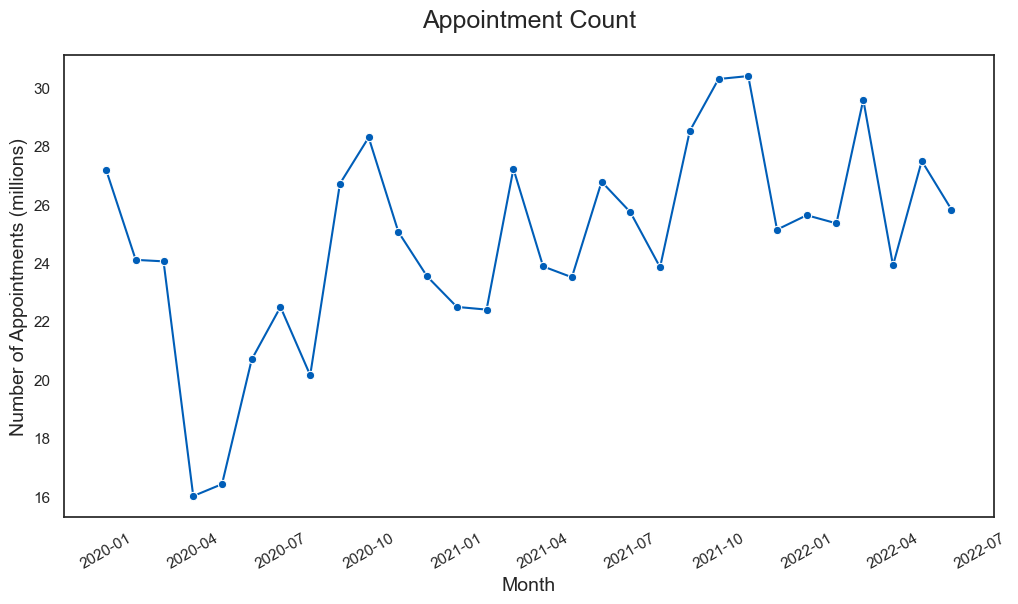

In [42]:
# Show total appointments per month
monthly_appt_count = (
    ar.groupby(['appointment_month'])['count_of_appointments']
    .sum()
    .reset_index(name='count'))

print(monthly_appt_count.dtypes)
print(monthly_appt_count.head())

# Convert date to datetime from Period
monthly_appt_count['appointment_month'] = monthly_appt_count['appointment_month'].dt.to_timestamp()
print(monthly_appt_count.dtypes)

# Set count in millions
monthly_appt_count['count_million'] = monthly_appt_count['count'] / 1e6

# Lineplot to show trends
fig1, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=monthly_appt_count, x='appointment_month', y='count_million', 
             marker='o', color='#005EB8')

# Title and Label
plt.title('Appointment Count', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)
plt.xticks(rotation=30)

plt.show()

<span style="color:purple"><b>Insight: April 2020 saw the lowest appointment counts, with October 0f 2021 experiencing the most demand. Post Summer 2020, we are seeing an increase in appointments </b></span>

In [43]:
fig1.savefig('fig1_monthly_appointments_trend.png', 
             dpi=300,       
             bbox_inches='tight')

 > **Service settings:**

In [44]:
monthly_service_setting_count = (nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments']
                                 .sum()
                                 .reset_index(name='count'))

monthly_service_setting_count.head()

,appointment_month,service_setting,count
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


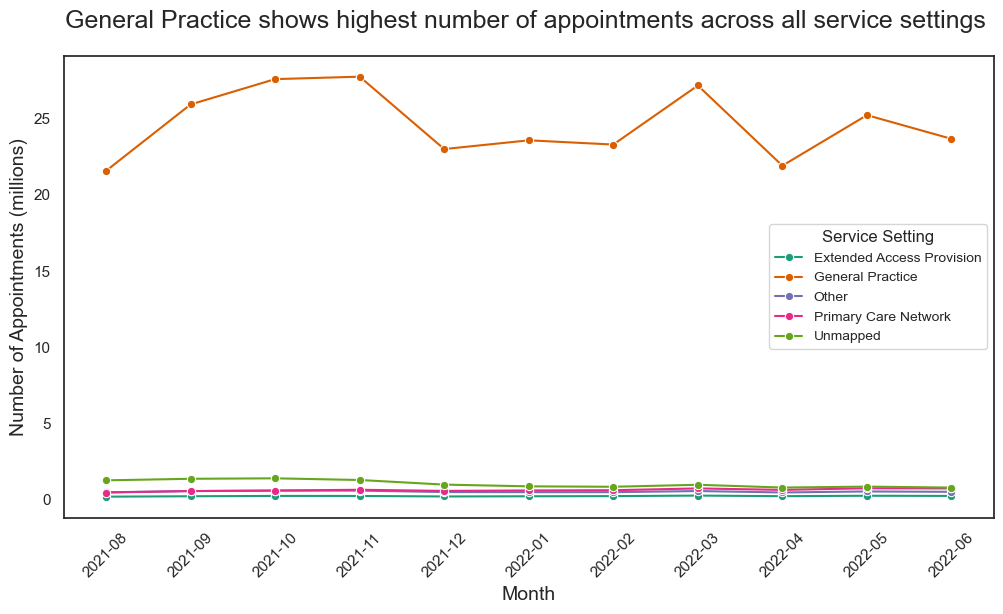

In [45]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
# Set count in millions
monthly_service_setting_count['count_million'] = monthly_service_setting_count['count'] / 1e6

fig4, ax = plt.subplots(figsize=(12,6))
sns.lineplot(
    data = monthly_service_setting_count, x='appointment_month',	
    y='count_million',hue='service_setting',
    marker='o', palette = 'Dark2')

# Legend placement
ax.legend(title='Service Setting', title_fontsize=12, fontsize=10,)

# Labels and title
plt.title('General Practice shows highest number of appointments across all service settings ', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)
plt.xticks(rotation=45)


# View output.
plt.show()

<span style="color:purple"><b>Insight:

<span style="color:purple"><b>General Practice (GP) records the highest number of appointments, indicating that GPs are being actively utilised, with relatively fewer appointments requiring additional support or reassignment to other roles.

<span style="color:purple"><b> As observed, the use of NHS appointments tends to increase during autumn and winter, leading up to Christmas. Interestingly, January and February see fewer appointments, followed by a sharp spike in March 2022, which then dips in April. This pattern is consistent across all service settings. Furthermore, the magnitude of the increase is proportionally larger for service settings that typically have higher appointment counts.</b></span>

<span style="color:brown"><b>Note: Find percentage of appointments that are GP (service setting) </b></span>

In [46]:
# Total number of appointments
nc_total_appt_count = nc['count_of_appointments'].sum()
print(nc_total_appt_count)

# Total appointments for General Practice
GP_service_setting_count = nc.loc[nc['service_setting'] == 'General Practice', 'count_of_appointments'].sum()

# Percentage of appointments that are seen by GPs
percent_GP = (GP_service_setting_count / nc_total_appt_count) * 100

print(f"The percentage of appointments conducted by GP is {percent_GP}%")

296046770
The percentage of appointments conducted by GP is 91.47598232536028%


<span style="color:purple"><b>Insight: 91.48% of appointments are seen by GP </b></span>

In [47]:
fig4.savefig('fig4_General Practice shows highest number of appointments across all service settings.png', 
             dpi=300,       
             bbox_inches='tight')

 > **Context types:**

In [48]:
# Create a separate data set that can be used in future weeks. 
monthly_context_types_count = (
    nc.groupby(['appointment_month', 'context_type'])['count_of_appointments']
    .sum()
    .reset_index(name='count'))

# View output.
monthly_context_types_count.head()

,appointment_month,context_type,count
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


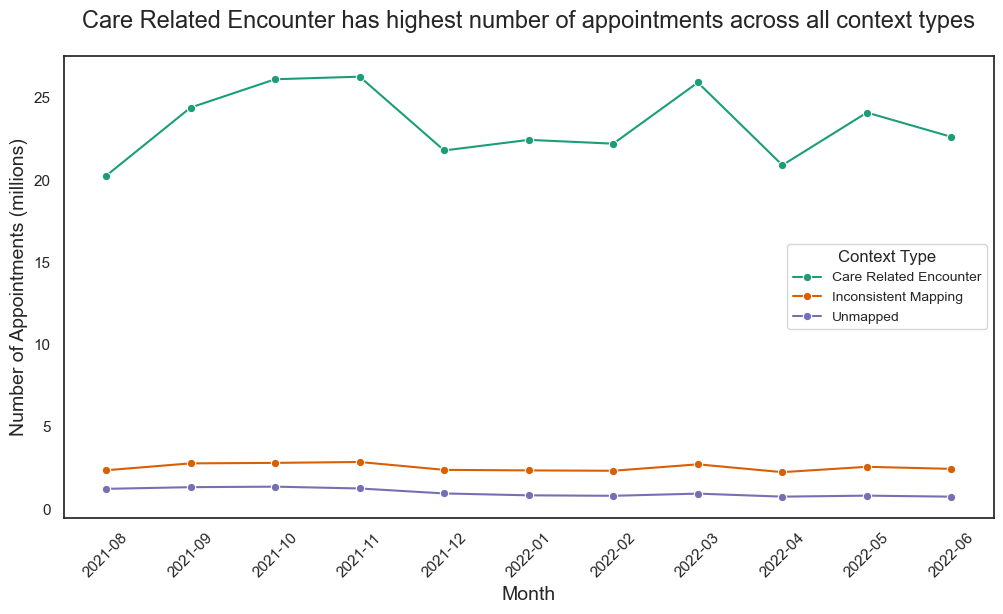

In [49]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
# Set count in millions
monthly_context_types_count['count_million'] = monthly_context_types_count['count'] / 1e6

fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(
    data = monthly_context_types_count,
    x='appointment_month',
    y='count_million',
    hue='context_type',
    marker='o',
    palette='Dark2')

# Titles and labels
plt.title('Care Related Encounter has highest number of appointments across all context types', fontsize=17, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)
plt.xticks(rotation=45)

# Legend
ax.legend(
    title='Context Type',
    title_fontsize=12,
    fontsize=10)

plt.show()

<span style="color:brown"><b>Note: Find percentage of appointments that are CRE (context type) </b></span>

In [50]:
# Total appointments for General Practice
CRE_contect_type_count = nc.loc[nc['context_type'] == 'Care Related Encounter', 'count_of_appointments'].sum()

# Percentage of appointments that are seen by GPs
percent_CRE = (CRE_contect_type_count / nc_total_appt_count) * 100

print(f"The percentage of appointments conducted by CRE is {percent_CRE}%")

The percentage of appointments conducted by CRE is 86.83599486662192%


<span style="color:purple"><b>Insight: 86.95% of appointments are Care Related Encounters </b></span>

>**National categories:**

In [51]:
# Create a separate data set that can be used in future weeks. 
monthly_nat_cat_count = (nc.groupby(['appointment_month', 'national_category'])['count_of_appointments']
                         .sum()
                         .reset_index(name='count'))

# View output.
monthly_nat_cat_count.head()

,appointment_month,national_category,count
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


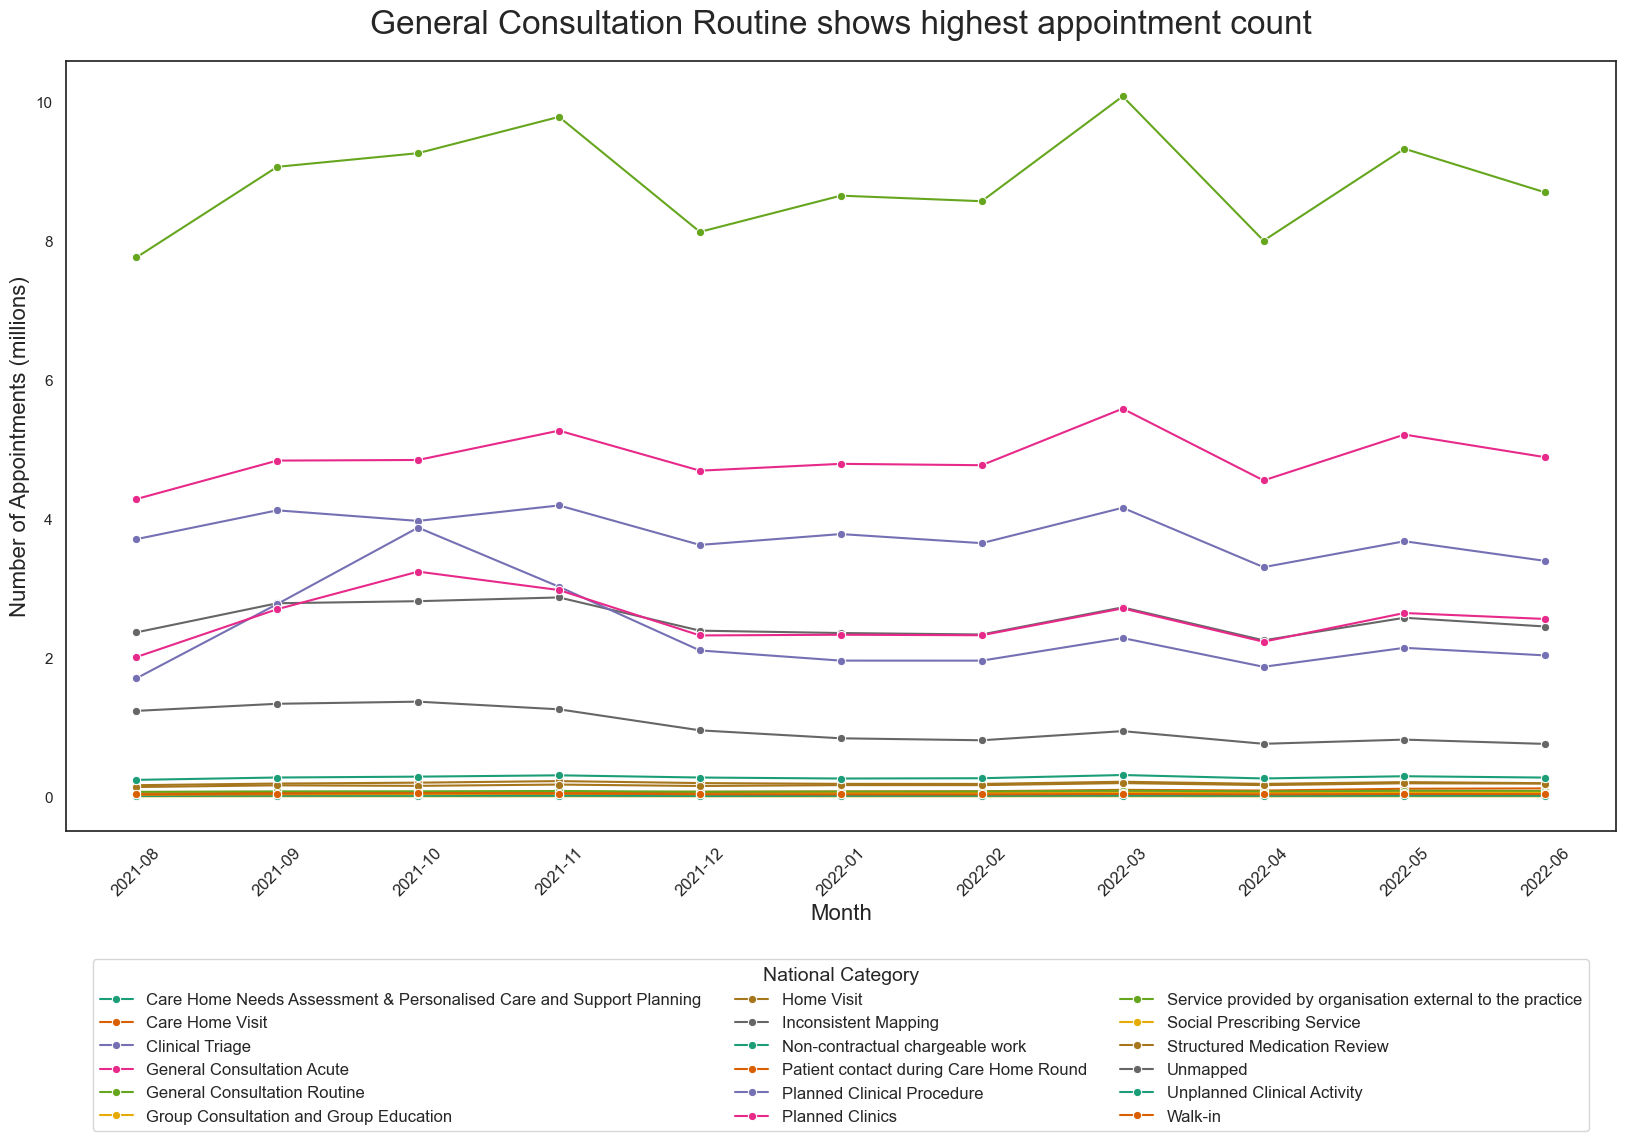

In [52]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
# Set count in millions
monthly_nat_cat_count['count_million'] = monthly_nat_cat_count['count'] / 1e6

fig_explore, ax = plt.subplots(figsize=(20, 10)) 
sns.lineplot(
    data=monthly_nat_cat_count, x='appointment_month',
    y='count_million', hue='national_category',
    marker='o',  palette='Dark2')

# Labels and title
plt.title('General Consultation Routine shows highest appointment count', fontsize=24, pad=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Appointments (millions)', fontsize=16) 
plt.xticks(rotation=45, fontsize=12) 

# Legend customization
ax.legend(
    title='National Category', 
    fontsize=12, 
    title_fontsize=14, 
    loc='lower center', # Move to lower center
    bbox_to_anchor=(0.5, -0.4), # Adjust vertical position
    ncol=3)
    
plt.show()

<span style="color:brown"><b>Note: Hard to read legend as colours have been repeated, so look into how to organise the legend by graph order </b></span>

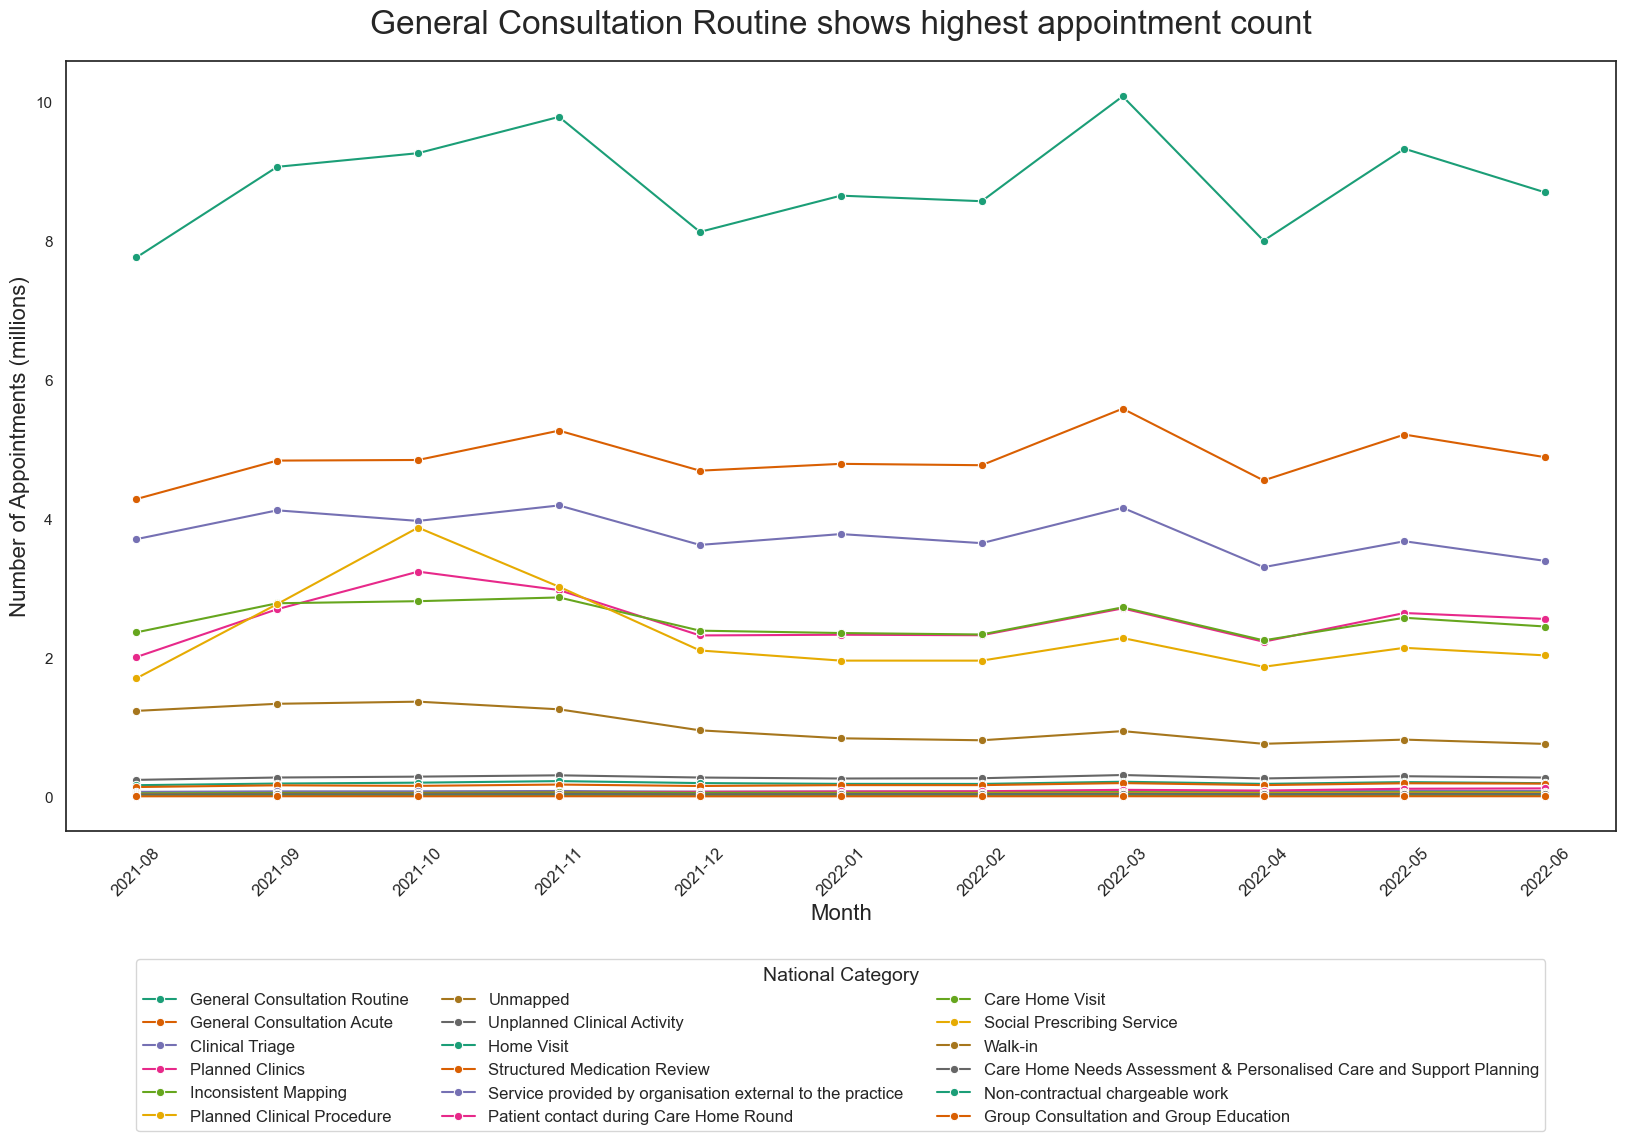

In [53]:
#Organise legend by number of appointments
nat_cat_order = (monthly_nat_cat_count.groupby('national_category')['count']
                 .sum()
                 .sort_values(ascending=False)
                 .index)

# Create a lineplot
# Set count in millions
monthly_nat_cat_count['count_million'] = monthly_nat_cat_count['count'] / 1e6

fig_explore, ax = plt.subplots(figsize=(20, 10)) 
sns.lineplot(
    data=monthly_nat_cat_count, x='appointment_month',
    y='count_million',  hue='national_category',  
    hue_order=nat_cat_order, marker='o', palette='Dark2')

# Labels and title
plt.title('General Consultation Routine shows highest appointment count', fontsize=24, pad=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Appointments (millions)', fontsize=16) 
plt.xticks(rotation=45, fontsize=12) 

# Legend customization
ax.legend(
    title='National Category', 
    fontsize=12, 
    title_fontsize=14, 
    loc='lower center', # Move to lower center
    bbox_to_anchor=(0.5, -0.4), # Adjust vertical position
    ncol=3)
    
plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

>**Summer (June to August 2021):**

In [54]:
# Create a separate data set that can be used in future weeks. 
# Assign summer months
summer_months = ['2021-06', '2021-07', '2021-08']

appt_service_setting_summer = (nc[nc['appointment_month'].isin(summer_months)] 
                               .groupby(['appointment_month', 'service_setting'])['count_of_appointments']
                               .sum()
                               .reset_index(name='count'))

# View output.
appt_service_setting_summer

,appointment_month,service_setting,count
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


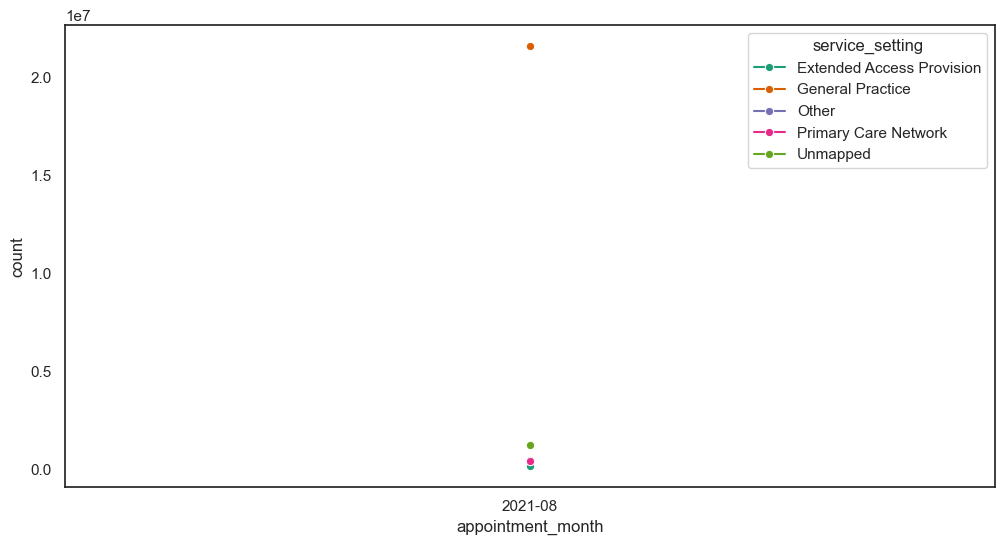

In [55]:
# Look at June to August 2021 in more detail to allow a closer look.
# Create a lineplot.
fig_explore, ax = plt.subplots(figsize=(12, 6)) 
sns.lineplot(data= appt_service_setting_summer, x='appointment_month',
             y='count', hue='service_setting', marker ='o', palette = 'Dark2')
plt.show()

<span style="color:brown"><b>Note: Since only August 2021 is included, there isn’t enough data to make the graph useful. </b></span>

>**Autumn (September to November 2021):**

   appointment_month            service_setting     count
0            2021-09  Extended Access Provision    187906
1            2021-09           General Practice  25940821
2            2021-09                      Other    527174
3            2021-09       Primary Care Network    530485
4            2021-09                   Unmapped   1336115
5            2021-10  Extended Access Provision    209539
6            2021-10           General Practice  27606171
7            2021-10                      Other    556487
8            2021-10       Primary Care Network    564981
9            2021-10                   Unmapped   1366656
10           2021-11  Extended Access Provision    207577
11           2021-11           General Practice  27767889
12           2021-11                      Other    558784
13           2021-11       Primary Care Network    614324
14           2021-11                   Unmapped   1256496


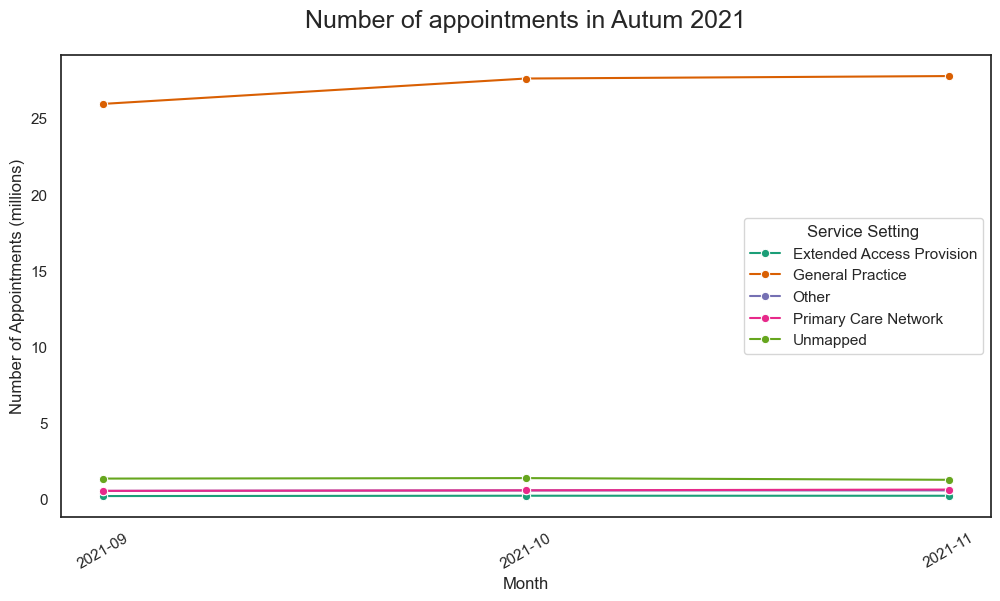

In [56]:
# Look at September to November 2021 in more detail to allow a closer look.
autumn_months= ('2021-09', '2021-10', '2021-11')

appt_service_setting_autumn = (
    nc[nc['appointment_month'].isin(autumn_months)] 
    .groupby(['appointment_month', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index(name='count'))

# View output.
print(appt_service_setting_autumn)

# Set count in millions
appt_service_setting_autumn['count_million'] = appt_service_setting_autumn['count'] / 1e6

# Create a lineplot.
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=appt_service_setting_autumn, x='appointment_month', y='count_million', 
             hue='service_setting', marker='o', palette='Dark2')

# Titles and labels
plt.title('Number of appointments in Autum 2021', fontsize=18, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')
plt.xticks(rotation=30)

# Legend customisation
plt.legend(title='Service Setting')

plt.show()

>**Winter (December to February 2022):**

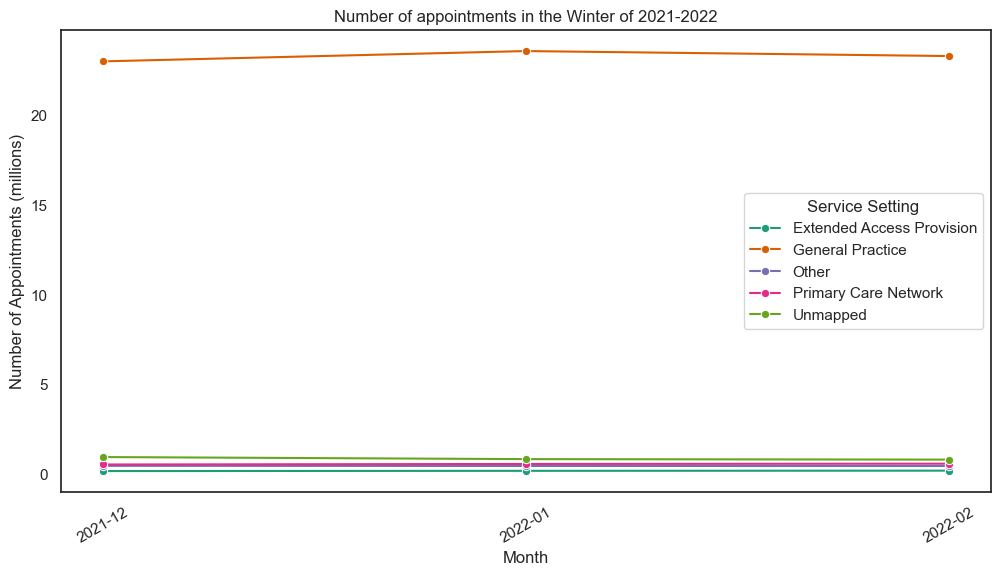

In [57]:
# Look at December to February 2022 in more detail to allow a closer look.
winter_months = ('2021-12', '2022-01', '2022-02')

appt_service_setting_winter = (
    nc[nc['appointment_month'].isin(winter_months)]
    .groupby(['appointment_month', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index(name='count'))

# Set count in millions
appt_service_setting_winter['count_million'] = appt_service_setting_winter['count'] / 1e6

# Create a lineplot.
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=appt_service_setting_winter, x='appointment_month', y='count_million', 
             hue='service_setting', marker='o', palette='Dark2')

# Title and labels
plt.title('Number of appointments in the Winter of 2021-2022')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (millions)')
plt.xticks(rotation=30)

# Legend customisation
plt.legend(title='Service Setting')

plt.show()

>**Spring (March to May 2022):**

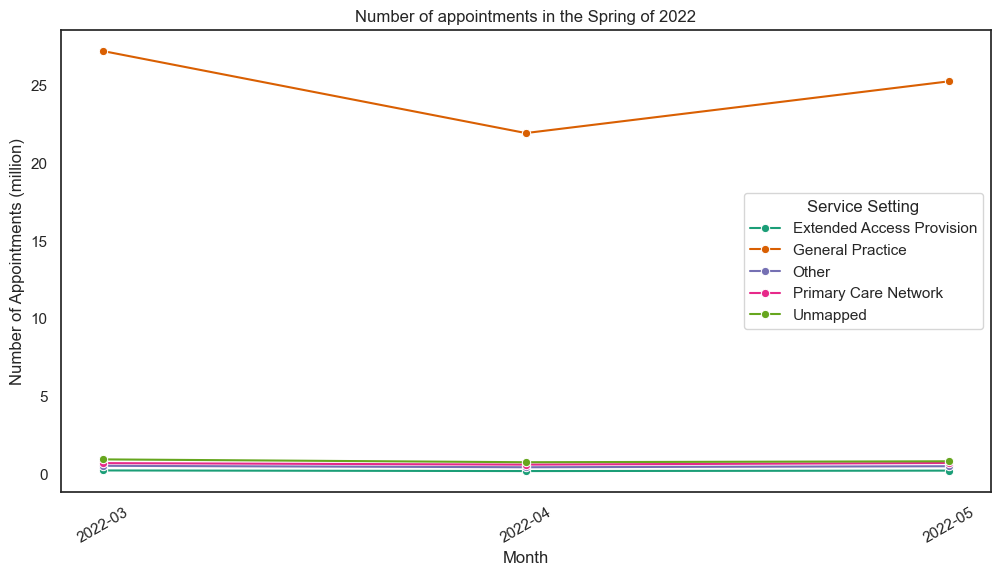

In [58]:
# Look at March to May 2022 in more detail to allow a closer look.
# Create a lineplot.
spring_months = ('2022-03', '2022-04', '2022-05')

appt_service_setting_spring = (
    nc[nc['appointment_month'].isin(spring_months)]
    .groupby(['appointment_month', 'service_setting'])['count_of_appointments']
    .sum()
    .reset_index(name='count'))  

# Set count in millions
appt_service_setting_spring['count_million'] = appt_service_setting_spring['count'] / 1e6

# Create a lineplot.
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=appt_service_setting_spring, x='appointment_month', y='count_million', 
             hue='service_setting', marker='o', palette='Dark2')

# Title and labels
plt.title('Number of appointments in the Spring of 2022')
plt.xlabel('Month')
plt.ylabel('Number of Appointments (million)')
plt.xticks(rotation=30)

# Legend customisation
plt.legend(title='Service Setting')

plt.show()

### Objective 3
Generate further insights to better understand NHS appointment data across hospitals, focusing on factors such as appointment times, popularity, common types, and performance metrics. The aim is to identify patterns, trends and opportunities for improving service delivery and resource allocation.


>**Time between appointments**

In [59]:
# Group by month and time between booking and appointment
monthly_time_between_appt_count = (ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments']
                                   .sum()
                                   .reset_index())

monthly_time_between_appt_count.head()

,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2020-01,1 Day,1945711
1,2020-01,15 to 21 Days,1881819
2,2020-01,2 to 7 Days,5604909
3,2020-01,22 to 28 Days,1313557
4,2020-01,8 to 14 Days,3444637


    appointment_month time_between_book_and_appointment  count_of_appointments
0             2020-01                             1 Day                1945711
1             2020-01                               NaN                1881819
2             2020-01                       2 to 7 Days                5604909
3             2020-01                               NaN                1313557
4             2020-01                               NaN                3444637
..                ...                               ...                    ...
235           2022-06                               NaN                1217197
236           2022-06                               NaN                3250347
237           2022-06                 More than 28 Days                1067420
238           2022-06                          Same Day               11461923
239           2022-06            Unknown / Data Quality                  21536

[240 rows x 3 columns]


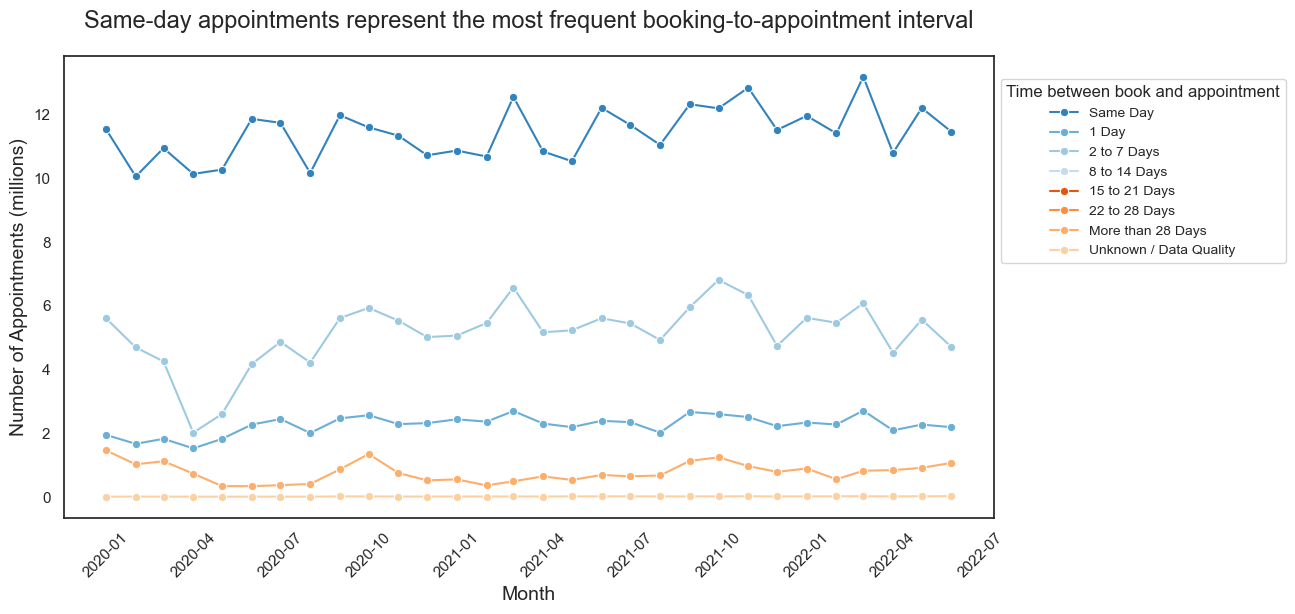

In [60]:
# Create a separate data set that can be used in future weeks. 
# Categorise by response time order for plot
order = ['Same Day',
         '1 Day',
         '2 to 7 Days',
         '8 to 14 Days',
         '15 to 21 Days',
         '22 to 28 Days',
         'More than 28 Days',
         'Unknown / Data Quality']

monthly_time_between_appt_count['time_between_book_and_appointment'] = pd.Categorical(
    monthly_time_between_appt_count['time_between_book_and_appointment'], categories=order, ordered=True)

# View output.
print(monthly_time_between_appt_count)

# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot
# Set count in millions
monthly_time_between_appt_count['count_million'] = monthly_time_between_appt_count['count_of_appointments'] / 1e6

# Convert Period (M) data to timestamp
monthly_time_between_appt_count['appointment_month'] = monthly_time_between_appt_count['appointment_month'].dt.to_timestamp()

fig2, ax = plt.subplots(figsize=(12,6))
sns.lineplot(
    data = monthly_time_between_appt_count,
    x='appointment_month',
    y='count_million',
    hue='time_between_book_and_appointment',
    marker='o',
    palette='tab20c')

# Titles and labels
plt.title('Same-day appointments represent the most frequent booking-to-appointment interval', fontsize=17, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)
plt.xticks(rotation=45)

# Legend
ax.legend(
    title='Time between book and appointment',
    title_fontsize=12,
    fontsize=10,
    loc='center left',
    bbox_to_anchor=(1, 0.75),)

plt.show()

<span style="color:brown"><b>Note: Calculate the percentage of appointments occurring on the same day as booking, within a week, and those taking more than 28 days. </b></span>

In [61]:
fig2.savefig('fig2_Same-day appointments represent the most frequent booking-to-appointment interval.png', dpi=300, bbox_inches='tight')

>**Same Day percentage**

In [62]:
ar_total_appt_count = ar['count_of_appointments'].sum()
print(ar_total_appt_count)

# Total appointments for Same Day
same_day_appt_count = ar.loc[ar['time_between_book_and_appointment'] == 'Same Day', 'count_of_appointments'].sum()

# Percent same day
percent_same_day = (same_day_appt_count / ar_total_appt_count) * 100

print(f"The percentage of appointments conducted in the same day is {percent_same_day}%")

742804525
The percentage of appointments conducted in the same day is 46.14231058972076%


<span style="color:purple"><b>Insights: Less than 50% of appointmnets are seen on the same day as when they were booked </b></span>

>**Same Day or 1 Day percentage**

In [63]:
# Define the time categories
same_1_day = ['Same Day', '1 Day']

# Total appointments for Same Day or 1 Day
same_1_day_appt_count = ar.loc[ar['time_between_book_and_appointment'].isin(same_1_day), 'count_of_appointments'].sum()

# Percent Same Day or 1 day
percent_same_1_day = (same_1_day_appt_count / ar_total_appt_count) * 100

print(f"The percentage of appointments conducted in the same day or in 1 day is {percent_same_1_day}%")

The percentage of appointments conducted in the same day or in 1 day is 55.258584753505644%


<span style="color:purple"><b>Insights: Just over than 50% of appointments are seen on the same day as or 1 day within  when they were booked </b></span>

>**Past 28 Days percentage**

In [64]:
# Total appointments for 28+ Days
days_28_appt_count = ar.loc[ar['time_between_book_and_appointment'] == 'More than 28 Days', 'count_of_appointments'].sum()

# Percent 28+ Days
percent_28_days = (days_28_appt_count / ar_total_appt_count) * 100

print(f"The percentage of appointments conducted almost a month after booking is {percent_28_days}%")

The percentage of appointments conducted almost a month after booking is 3.1032372884373585%


<span style="color:purple"><b>Insights: Less than 5% of appointments are seen a month after booking. </b></span>

>**Understanding which time periods or dates are missing in the line plot - does the pattern of missing data reveal anything?**

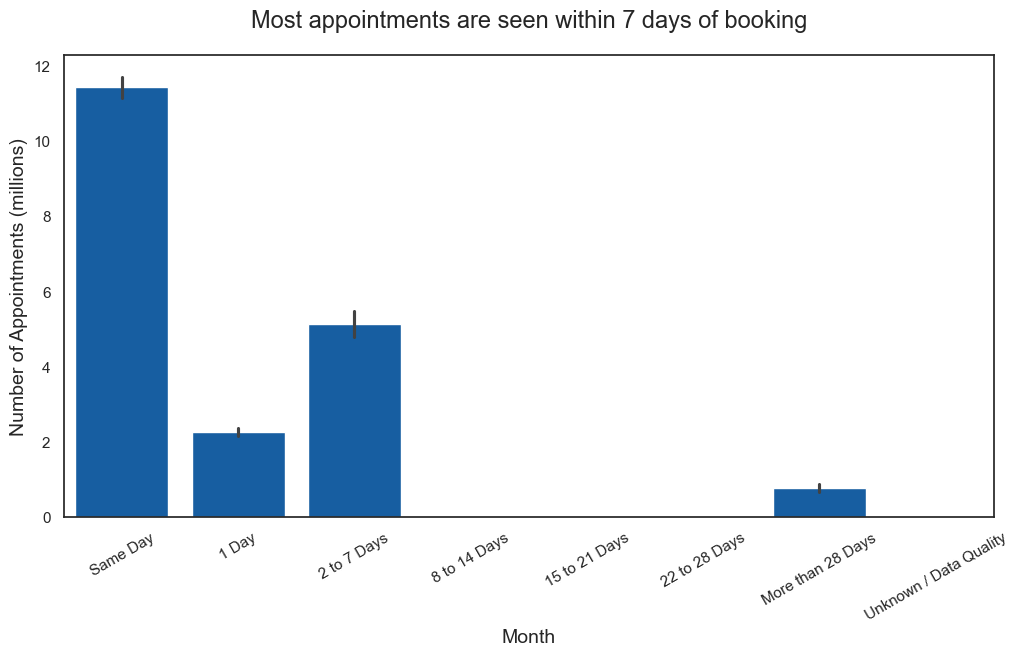

In [65]:
# Total appointment counts relationships between categories of time
# Create a barplot
# Set count in millions
monthly_time_between_appt_count['count_million'] = monthly_time_between_appt_count['count_of_appointments'] / 1e6

fig_explore, ax = plt.subplots(figsize=(12,6))
sns.barplot(
    data = monthly_time_between_appt_count,
    x='time_between_book_and_appointment',
    y='count_million', color='#005EB8')

# Titles and labels
plt.title('Most appointments are seen within 7 days of booking', fontsize=17, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)
plt.xticks(rotation=30)

plt.show()

<span style="color:purple"><b>Insights: It’s unusual that three of the time categories between booking and appointment show no recorded counts. This pattern may suggest that once appointments extend beyond a week, they are either deprioritised and/or delayed. It’s also possible that appointments past a certain threshold trigger administrative actions, such as reminders or rebookings, causing them to reappear only once they reach the one-month mark. </b></span>

>**How many people attended their appointments?**

In [66]:
# Group by attendance type 
attendance_count = (ar.groupby('appointment_status')['count_of_appointments']
                    .sum()
                    .reset_index(name='count'))

attendance_count

,appointment_status,count
0,Attended,677755876
1,DNA,30911233
2,Unknown,34137416


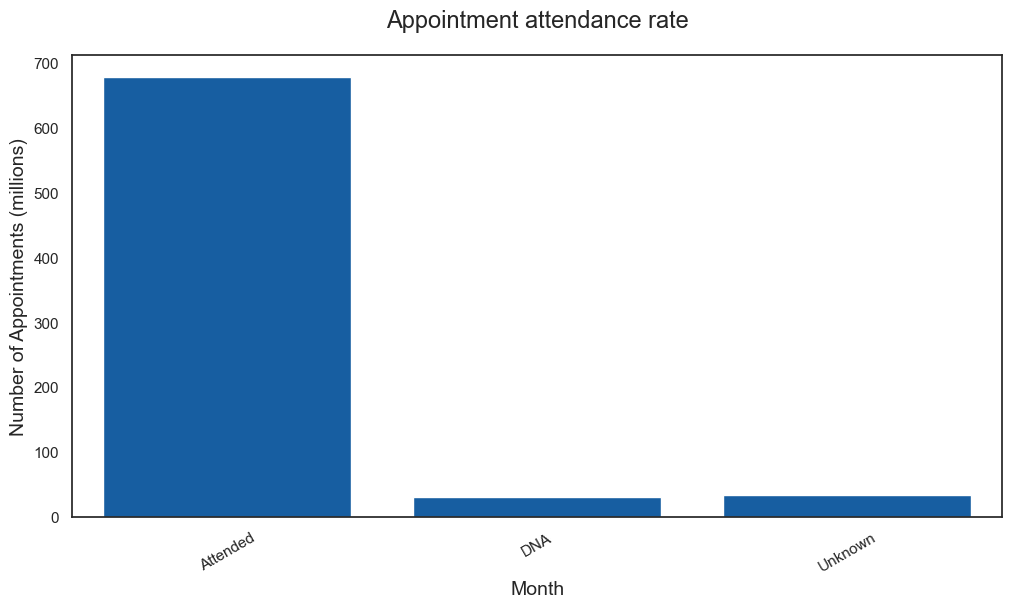

In [67]:
# Create a barplot
# Set count in millions
attendance_count['count_million'] = attendance_count['count'] / 1e6

fig11b, ax = plt.subplots(figsize=(12,6))
sns.barplot(
    data = attendance_count,
    x='appointment_status',
    y='count_million', color='#005EB8')

# Titles and labels
plt.title('Appointment attendance rate', fontsize=17, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)
plt.xticks(rotation=30)

plt.show()

In [68]:
fig11b.savefig('fig11b_91% of appointments are attended', dpi=300, bbox_inches='tight')

>**Percentage of appointments attended**

In [69]:
# Attended appointments
attend_count = ar.loc[ar['appointment_status'] == 'Attended', 'count_of_appointments'].sum()

# Percent 28+ Days
percent_attend_count = (attend_count / ar_total_appt_count) * 100

print(f"The percentage of appointments that we attended is {percent_attend_count}%")

The percentage of appointments that we attended is 91.24283081070354%


<span style="color:purple"><b>Insight: Around 90% of appointments are attended. </b></span>

>**What was the most popular appointment mode?**

In [70]:
# Calculate count by appointment type
appointment_mode_count = (ar.groupby('appointment_mode')['count_of_appointments']
                          .sum()
                          .sort_values(ascending=False)
                          .reset_index(name='count'))

appointment_mode_count.head()                    

,appointment_mode,count
0,Face-to-Face,439981729
1,Telephone,267862657
2,Unknown,26451305
3,Home Visit,4887876
4,Video/Online,3620958


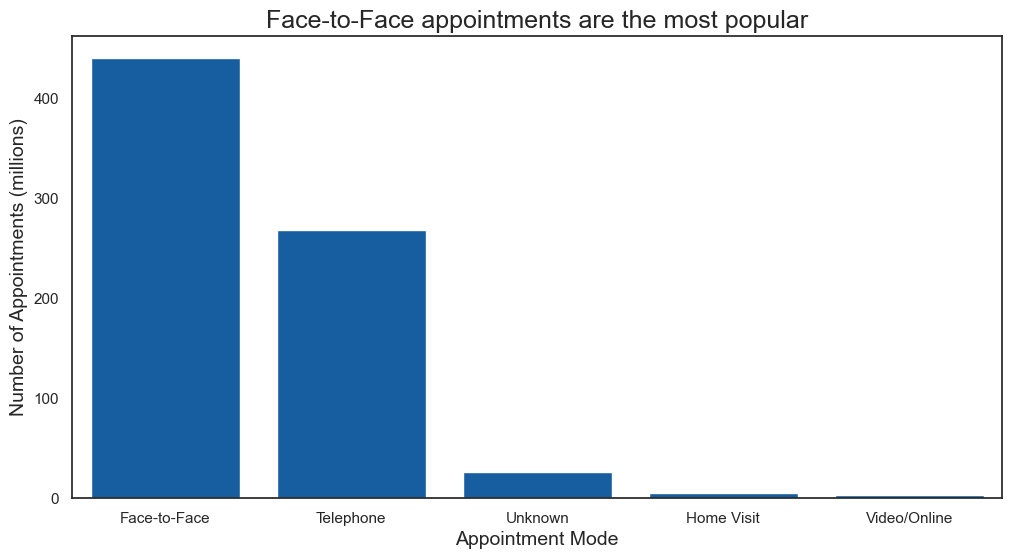

In [71]:
# Set count in millions
appointment_mode_count['count in millions'] = appointment_mode_count['count'] / 1e6

# Create bar plot 
fig5, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=appointment_mode_count, x='appointment_mode', y='count in millions', color='#005EB8')

# Title and label
plt.title('Face-to-Face appointments are the most popular', fontsize=18)
plt.xlabel('Appointment Mode', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)

plt.show()

In [72]:
# Face-to-face appointments count
f2f_count = ar.loc[ar['appointment_mode'] == 'Face-to-Face', 'count_of_appointments'].sum()

# Percent face-to-face
percent_f2f_count = (f2f_count / ar_total_appt_count) * 100

print(f"The percentage of appointments that we attended is {percent_f2f_count}%")

# Telephone appointments count
telephone_count = ar.loc[ar['appointment_mode'] == 'Telephone', 'count_of_appointments'].sum()

# Percent telephone
percent_telephone_count = (telephone_count / ar_total_appt_count) * 100

print(f"The percentage of appointments that we attended is {percent_telephone_count}%")

The percentage of appointments that we attended is 59.23250521393902%
The percentage of appointments that we attended is 36.06098885840794%


<span style="color:purple"><b>Insights: Around 60% of appointments are Face-to-face, with around 35% done via telephone </b></span>

In [73]:
fig5.savefig('fig5_Face-to-Face appointments are the most popular', dpi=300, bbox_inches='tight')

>**Actual duration of appointments**

In [74]:
# Calculate count by appointment type
order = [
    '1-5 Minutes',
    '6-10 Minutes',
    '11-15 Minutes',
    '16-20 Minutes',
    '21-30 Minutes',
    '31-60 Minutes',
    'Unknown / Data Quality']

# Convert to categorical with the desired order
ad['actual_duration'] = pd.Categorical(ad['actual_duration'], categories=order, ordered=True)

# Calculate count by duration type
duration_count = (ad.groupby('actual_duration', as_index=False)['count_of_appointments']
                  .sum()
                  .sort_values('actual_duration'))

duration_count

,actual_duration,count_of_appointments
0,1-5 Minutes,28600865
1,6-10 Minutes,33800815
2,11-15 Minutes,25160882
3,16-20 Minutes,16004247
4,21-30 Minutes,15026365
5,31-60 Minutes,9103432
6,Unknown / Data Quality,40284086


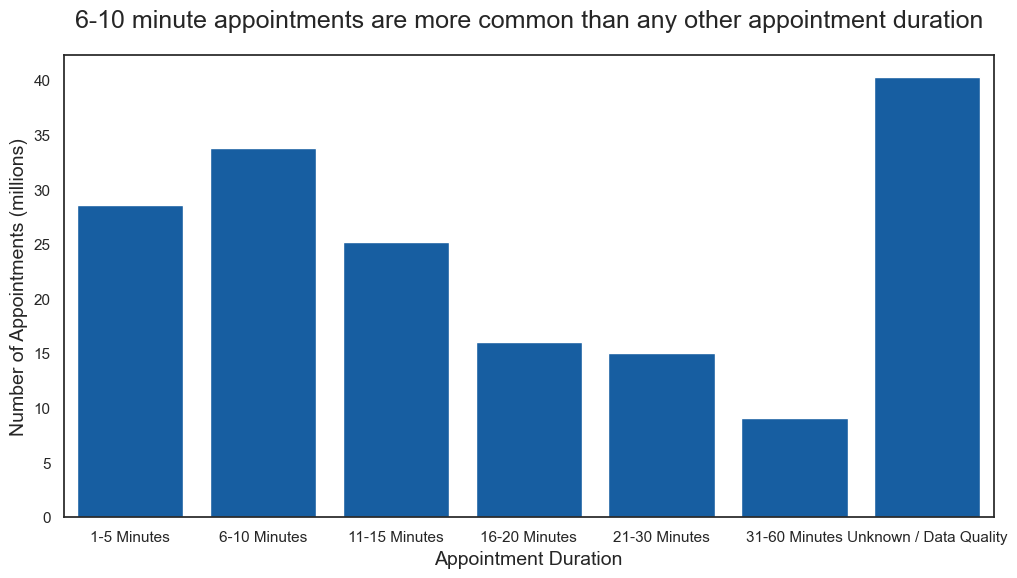

In [75]:
# Set count in millions
duration_count ['count in millions'] = duration_count  ['count_of_appointments'] / 1e6

# Create bar plot 
fig3, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=duration_count  , x='actual_duration', y='count in millions', color='#005EB8')

# Title and label
plt.title('6-10 minute appointments are more common than any other appointment duration', fontsize=18, pad=20)
plt.xlabel('Appointment Duration', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)

plt.show()

In [76]:
fig3.savefig('fig3_6-10 minute appointments are more common than any other appointment duration', dpi=300, bbox_inches='tight')

>**Percentage of appointments complete within NHS targets of 10 mins**

In [77]:
# Count number of appointments in ar
ad_total_appt_count = ad['count_of_appointments'].sum()

# Establish target categories
NHS_targets_10 = ['1-5 Minutes', '6-10 Minutes']

# 10 mins target count
NHS_targets_10_count = ad.loc[ad['actual_duration'].isin(NHS_targets_10), 'count_of_appointments'].sum()

# Percent at target
percent_NHS_targets_10_count = (NHS_targets_10_count / ad_total_appt_count) * 100

print(f"The percentage of appointments held within the appointment target duration of 10 mins is {percent_NHS_targets_10_count}%")

The percentage of appointments held within the appointment target duration of 10 mins is 37.148126523969786%


>**Percentage of appointments complete within NHS targets of 15 mins (max threshold)**

In [78]:
# Establish target categories
NHS_targets_15 = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes']

# 10 mins target count
NHS_targets_15_count = ad.loc[ad['actual_duration'].isin(NHS_targets_15), 'count_of_appointments'].sum()

# Percent at target
percent_NHS_targets_15_count = (NHS_targets_15_count / ad_total_appt_count) * 100

print(f"The percentage of appointments held within the appointment target duration of 15 mins consultation + admin time) is {percent_NHS_targets_15_count}%")

The percentage of appointments held within the appointment target duration of 15 mins consultation + admin time) is 52.12656345051847%


<span style="color:purple"><b>Insight: Only 50% of appointments are seen in the standard 15 mins target  </b></span>

<span style="color:brown"><b>Note: The percentages derived from the known appointment durations can be used to proportionally distribute the “Unknown / Data Quality” appointments across these same categories. This may provide a more representative estimate of the overall appointment duration breakdown.</b></span>

In [79]:
# Establish durations included in this new calculation
unknown_data_durations = ['Unknown / Data Quality']

# Unknown data appointment count 
NHS_unknown_data_count = ad.loc[ad['actual_duration'].isin(unknown_data_durations), 'count_of_appointments'].sum()

# Estimate how many of the unknown appointments are likely within the 10-minute target
NHS_targets_10_from_unknown_data_count = ((percent_NHS_targets_10_count / 100) * NHS_unknown_data_count)

# Combine documented target 10 count with additional count
NHS_targets_10_est_data_count= (NHS_targets_10_count + NHS_targets_10_from_unknown_data_count)

# Recalculate percentage of total appointments reaching target
percent_targets_10_est_data = (NHS_targets_10_est_data_count / ad_total_appt_count) * 100

print(f"The estimated percentage of appointments held within the NHS 10-minute target "
    f"(including redistributed unknown data) is {percent_targets_10_est_data}%.")

The estimated percentage of appointments held within the NHS 10-minute target (including redistributed unknown data) is 46.05675944965437%.


In [80]:
# Estimate how many of the unknown appointments are likely within the 15-minute (max) target
NHS_targets_15_from_unknown_data_count = ((percent_NHS_targets_15_count / 100) * NHS_unknown_data_count)

# Combine documented target 10 count with additional count
NHS_targets_15_est_data_count= (NHS_targets_15_count + NHS_targets_15_from_unknown_data_count)

# Recalculate percentage of total appointments reaching target
percent_targets_15_est_data = (NHS_targets_15_est_data_count / ad_total_appt_count) * 100

print(f"The estimated percentage of appointments held within the NHS 10-minute target "
    f"(including redistributed unknown data) is {percent_targets_15_est_data}%.")

The estimated percentage of appointments held within the NHS 10-minute target (including redistributed unknown data) is 64.62723206858287%.


<span style="color:purple"><b>Insight: 30% of appointments overrun  </b></span>

<span style="color:brown"><b>Note: When data is missing or marked as “Unknown / Data Quality,” it’s rarely random — and in this context, it may be systematically biased toward longer, more complex appointments that are harder to capture or less likely to be recorded accurately </b></span>

>**Unplanned or additional activity that the NHS cannot schedule in advance but can anticipate and resource for based on known demand patterns.**

In [81]:
nc_nat_cat_count = (nc.groupby('national_category')['count_of_appointments']
                         .sum()
                         .reset_index())
nc_nat_cat_count.head()

,national_category,count_of_appointments
0,Care Home Needs Assessment & Personalised Care...,405904
1,Care Home Visit,628279
2,Clinical Triage,41546964
3,General Consultation Acute,53691150
4,General Consultation Routine,97271522


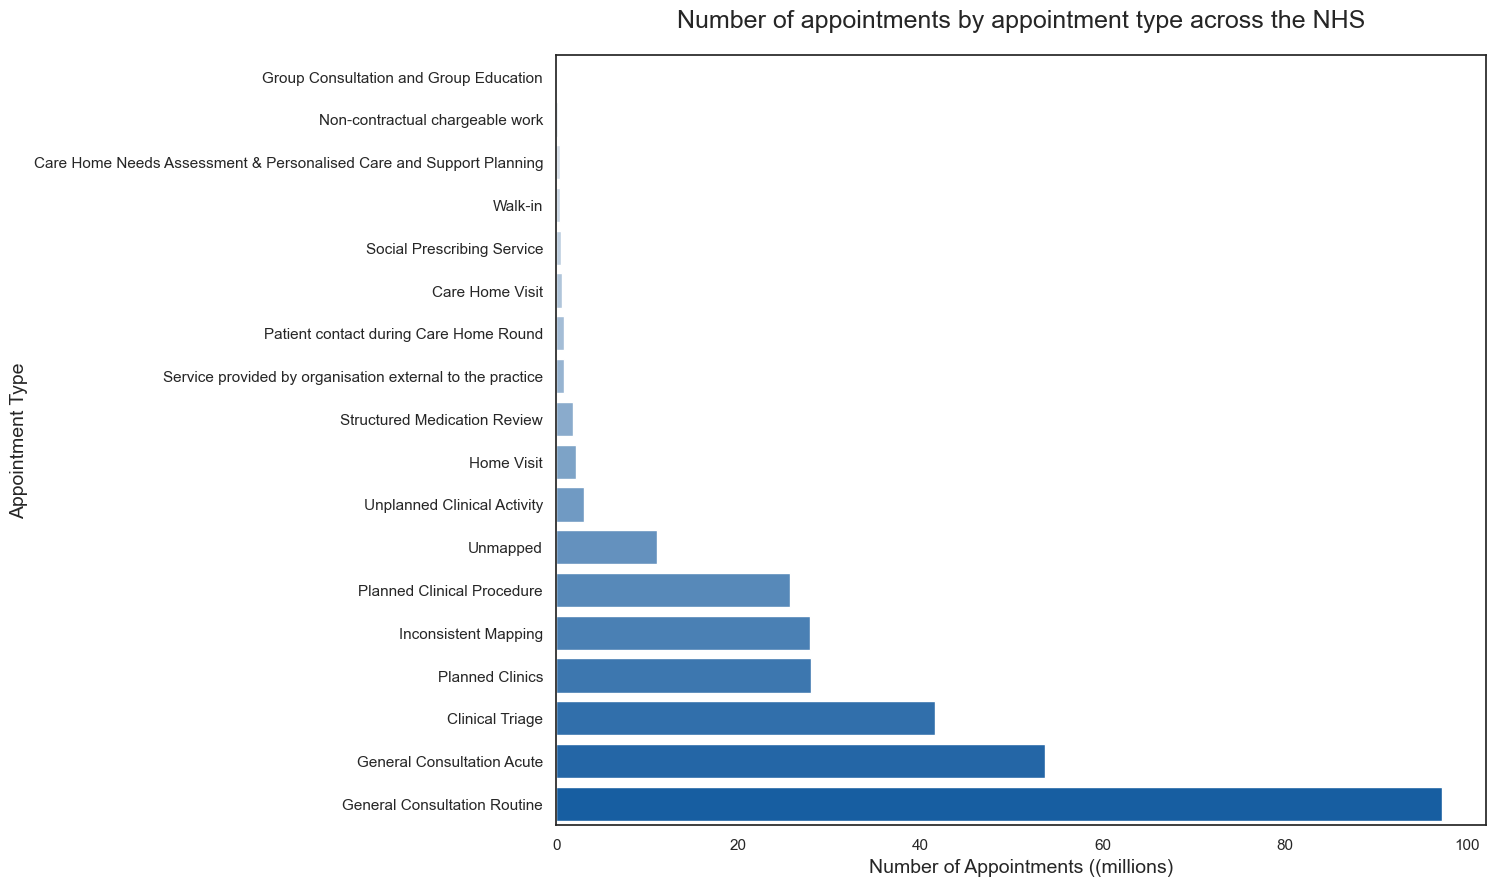

In [82]:
# Create barplot
# Assign million on axis
nc_nat_cat_count['count_of_appointments_millions'] =nc_nat_cat_count['count_of_appointments'] / 1e6

# Create blue gradient based on count
# Sort data so smallest value gets lightest color, largest gets darkest
nc_nat_cat_count = nc_nat_cat_count.sort_values('count_of_appointments_millions', ascending=True)

# Create horizontal barplot with a gradient from light blue to your #005EB8
palette = sns.light_palette("#005EB8", n_colors=len(nc_nat_cat_count), reverse=False)

# Create horizontal  barplot
fig6, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=nc_nat_cat_count, x='count_of_appointments_millions', y='national_category', palette=palette)


# Title & axis
plt.title('Number of appointments by appointment type across the NHS', fontsize=18, pad=20)
plt.xlabel('Number of Appointments ((millions)', fontsize=14)
plt.ylabel('Appointment Type', fontsize=14)

plt.show()

<span style="color:brown"><b>Note: Find percentage unplanned including walk-ins </b></span>

In [83]:
# Identify fields that fit the 'unplanned' description
nc_appointment_type_unplanned = ['Unplanned Clinical Activity', 'Walk-in']

# Filter to keep only those rows
unplanned_nc = nc[nc['national_category'].isin(nc_appointment_type_unplanned)]

# Sum up the counts
nc_appointment_type_unplanned_count = (unplanned_nc['count_of_appointments'].sum())

# Percent unplanned 
percent_nc_appointment_type_unplanned = (nc_appointment_type_unplanned_count / nc_total_appt_count) * 100

print(f"The percentage of appointments that are unplanned activity e.g. urgent appointments, emergency visi or last-minute follow-up and also walk-ins is {percent_nc_appointment_type_unplanned}%")

The percentage of appointments that are unplanned activity e.g. urgent appointments, emergency visi or last-minute follow-up and also walk-ins is 1.1715148927313073%


<span style="color:purple"><b>Insight: Only 1% of appointments are unplanned </b></span>

In [84]:
fig6.savefig('fig6_Number of appointments by appointment type across the NHS', dpi=300, bbox_inches='tight')

>**What service-setting experiences most walk-ins/unplanned activity?**

             service_setting  count_of_appointments
0  Extended Access Provision                  45799
1           General Practice                3236439
2                      Other                  85883
3       Primary Care Network                 100111


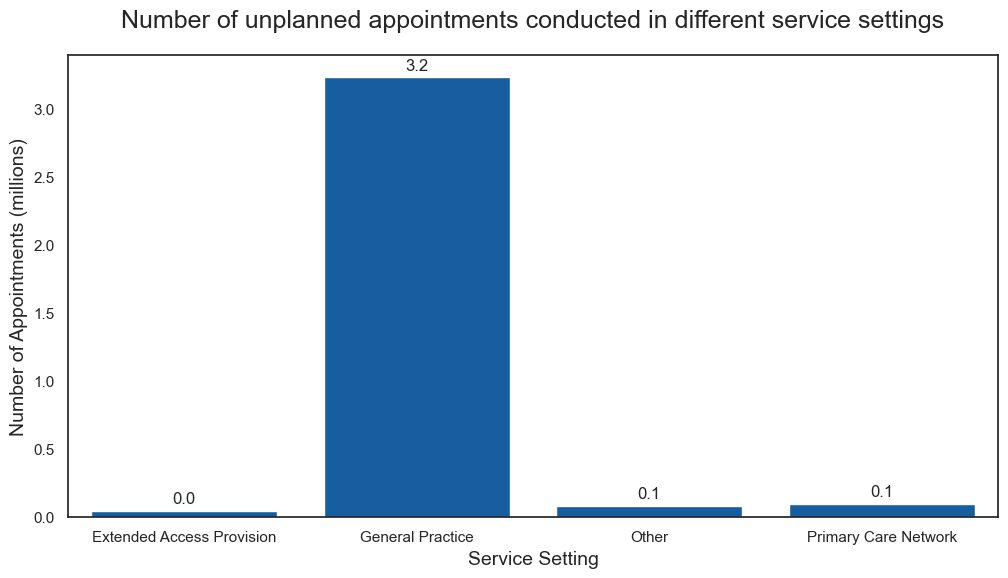

In [85]:
# Sum up the counts of unplanned by service setting
nc_Service_setting_appointment_type_unplanned_count  = (unplanned_nc.groupby('service_setting')['count_of_appointments']
                                                        .sum()
                                                        .reset_index())

print(nc_Service_setting_appointment_type_unplanned_count)

# Assign million on axis
nc_Service_setting_appointment_type_unplanned_count ['count_of_appointments_millions'] = (
    nc_Service_setting_appointment_type_unplanned_count ['count_of_appointments'] / 1e6)

# Create barplot
fig7, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=nc_Service_setting_appointment_type_unplanned_count, x='service_setting', y='count_of_appointments_millions',
            color='#005EB8')

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize = 12, padding=3) 

# Title & axis
plt.title('Number of unplanned appointments conducted in different service settings', fontsize=18, pad=20)
plt.xlabel('Service Setting', fontsize=14)
plt.ylabel('Number of Appointments (millions)', fontsize=14)

plt.show()

In [86]:
fig7.savefig('fig7_Number of unplanned appointments conducted in different service settings', dpi=300, bbox_inches='tight')

>**Determining if there is a relationship between appointment mode and attendance rate**

  appointment_mode appointment_status      count
0     Face-to-Face           Attended  392705999
1     Face-to-Face                DNA   24253038
2     Face-to-Face            Unknown   23022692
3       Home Visit           Attended    3612068
4       Home Visit                DNA     187571


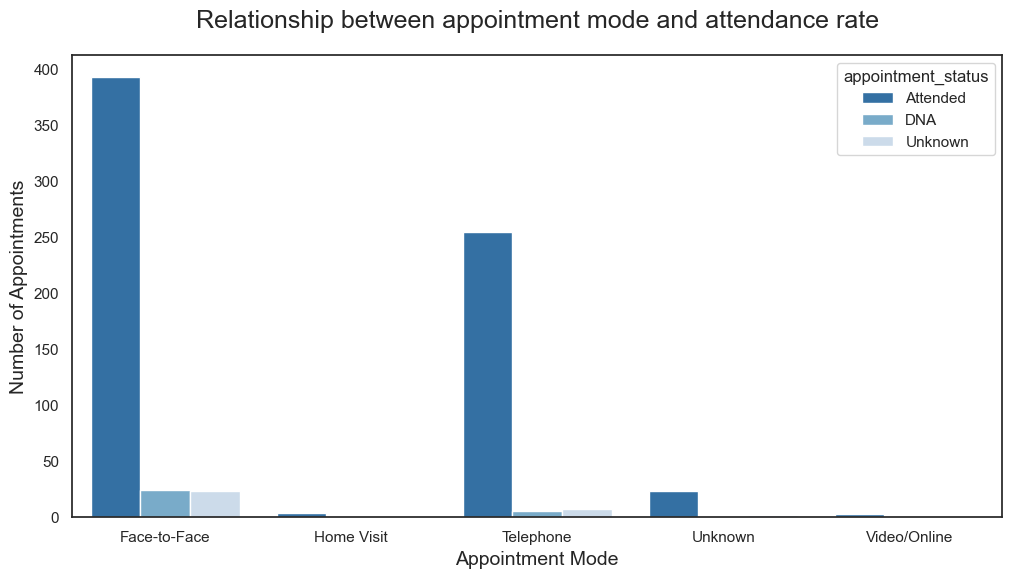

In [87]:
ar_appt_mode_to_status = (ar.groupby(['appointment_mode', 'appointment_status'])['count_of_appointments']
                          .sum()
                          .reset_index(name='count'))

print(ar_appt_mode_to_status.head())

# Convert axis to millions
ar_appt_mode_to_status['count_millions'] = ar_appt_mode_to_status['count'] /1e6

# Show information in barplot
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=ar_appt_mode_to_status, x='appointment_mode', y='count_millions',
            hue='appointment_status', palette='Blues_r')

# Title & axis
plt.title('Relationship between appointment mode and attendance rate', fontsize=18, pad=20)
plt.xlabel('Appointment Mode', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)

plt.show()

<span style="color:brown"><b>Note: Let's show this in a better way </b></span>

In [88]:
# Copy data
ar_appt_mode_to_status_2 = ar_appt_mode_to_status.copy()

# Pivot so appointment_status become columns
ar_appt_mode_to_status_pivot = ar_appt_mode_to_status_2.pivot(index='appointment_mode',
                                                columns='appointment_status',
                                                values='count')

ar_appt_mode_to_status_pivot.head()

appointment_status,Attended,DNA,Unknown
appointment_mode,,,
Face-to-Face,392705999,24253038,23022692
Home Visit,3612068,187571,1088237
Telephone,254799226,5262251,7801180
Unknown,23335350,1049427,2066528
Video/Online,3303233,158946,158779


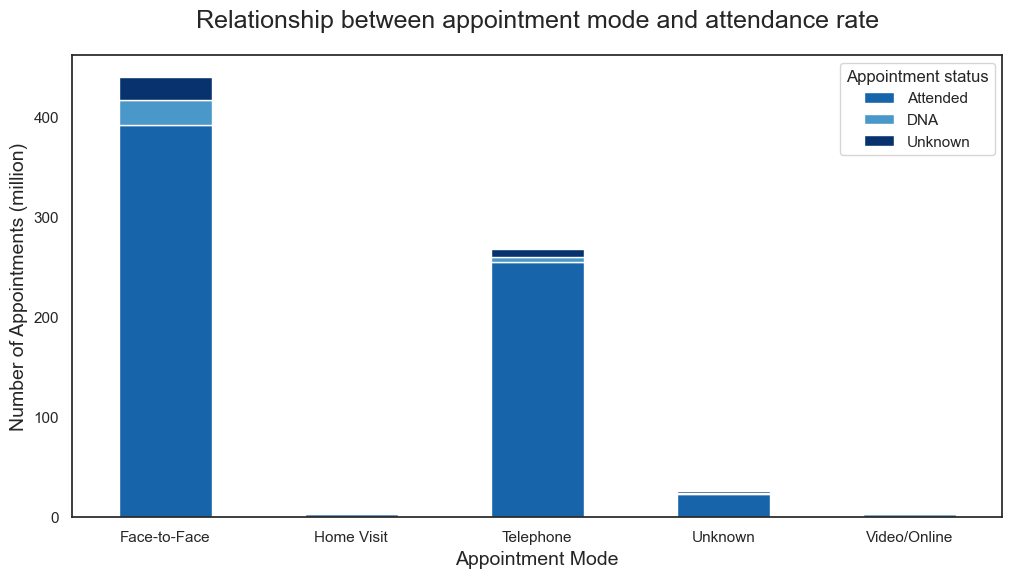

In [89]:
# Convert counts to millions (optional)
ar_appt_mode_to_status_pivot_millions = ar_appt_mode_to_status_pivot / 1e6

# Show information in stacked barplot
# Make sure blues used in bars
cmap = plt.get_cmap('Blues')
colors = [cmap(0.8), cmap(0.6), cmap(0.99)] 

fig12, ax = plt.subplots(figsize=(12,6))
ar_appt_mode_to_status_pivot_millions.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Title & axis
plt.title('Relationship between appointment mode and attendance rate', fontsize=18, pad=20)
plt.xlabel('Appointment Mode', fontsize=14)
plt.ylabel('Number of Appointments (million)', fontsize=14)
plt.xticks(rotation=0)

# Improve legend
plt.legend(title = 'Appointment status')

plt.show()

<span style="color:brown"><b>Note: Find percentage unattended in each appointment mode category </b></span>

In [90]:
# Total Face-to-Face appointments
total_face_to_face = ar_appt_mode_to_status_pivot.loc['Face-to-Face'].sum()

# Count of unattended Face-to-Face appointments
unattended_face_to_face = ar_appt_mode_to_status_pivot.loc['Face-to-Face', 'DNA']

# Calculate percentage
percent_unattended_face_to_face = (unattended_face_to_face / total_face_to_face) * 100

print(f"Percentage of unattended Face-to-Face appointments: {percent_unattended_face_to_face}%")

Percentage of unattended Face-to-Face appointments: 5.5122829884601865%


In [91]:
# Total telephone appointments
total_telephone = ar_appt_mode_to_status_pivot.loc['Telephone'].sum()

# Count of unattended telephone appointments
unattended_telephone = ar_appt_mode_to_status_pivot.loc['Telephone', 'DNA']

# Calculate percentage
percent_unattended_telephone = (unattended_telephone / total_telephone) * 100

print(f"Percentage of unattended Telephone appointments: {percent_unattended_telephone}%")

Percentage of unattended Telephone appointments: 1.9645332645229454%


<span style="color:purple"><b>Insight: Face-to-face appointments are more likely to be missed than telephone appointments. </b></span>

In [92]:
fig12.savefig('fig12_Relationship between appointment mode and attendance rate', dpi=300, bbox_inches='tight')

>**Is there a relationship between patient attendance and the type of healthcare professional conducting the appointment?**

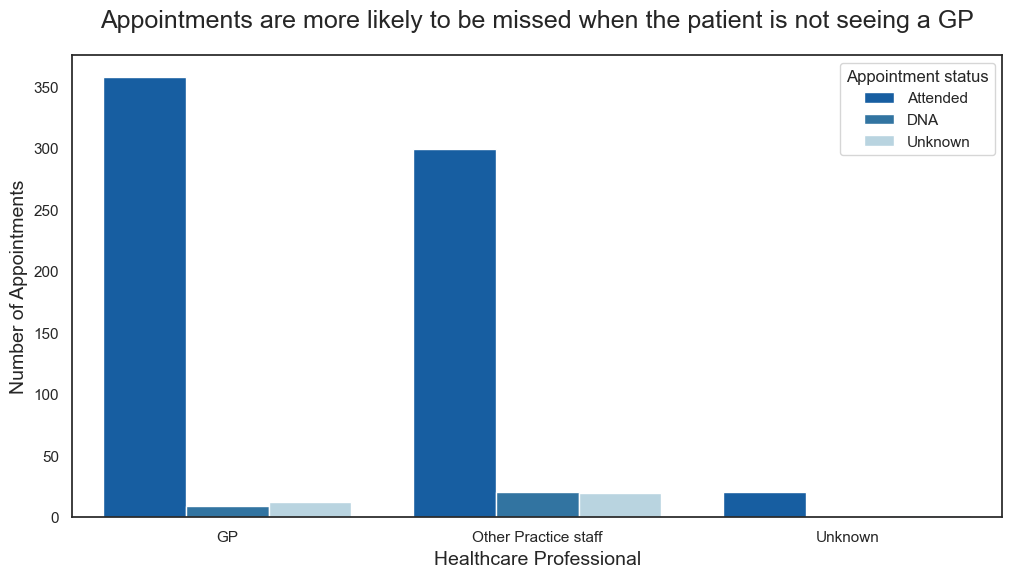

In [93]:
# Group count by profession and status 
ar_appt_att_to_hcp = (ar.groupby(['hcp_type', 'appointment_status'])['count_of_appointments']
                          .sum()
                          .reset_index(name='count'))

# Count in millions
ar_appt_att_to_hcp['count_millions'] = ar_appt_att_to_hcp['count'] / 1e6

# Show information in barplot
# Use blue in bars
colors = ['#005eb8','#1f77b4', '#B3D7E6']

fig13, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=ar_appt_att_to_hcp, x='hcp_type', y='count_millions',
            hue='appointment_status', palette=colors)

# Title & axis
plt.title('Appointments are more likely to be missed when the patient is not seeing a GP', fontsize=18, pad=20)
plt.xlabel('Healthcare Professional', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)

# Improve legend
plt.legend(title = 'Appointment status')

plt.show()

In [94]:
fig13.savefig('fig13_Appointments are more likely to be missed when the patient is not seeing a GP', dpi=300, bbox_inches='tight')

>**Hospitals most common appointment duration cateogory?**

In [95]:
# Count how many times each duration appears per hospital
mode_hosp_duration = (ad.groupby(['sub_icb_location_name', 'actual_duration'])['actual_duration']
                      .count()
                      .reset_index(name='count'))

# Sort so the most common duration for each hospital is on top
mode_hosp_duration = (mode_hosp_duration.sort_values(['sub_icb_location_name', 'count'], 
                                                     ascending=[True, False]))

# Keep only the most common duration per hospital
mode_hosp_duration = mode_hosp_duration.drop_duplicates(subset=['sub_icb_location_name'])

# View output 
mode_hosp_duration.head()

,sub_icb_location_name,actual_duration,count
6,NHS Bath and North East Somerset Swindon and W...,Unknown / Data Quality,186
7,NHS Bedfordshire Luton and Milton Keynes ICB -...,1-5 Minutes,212
14,NHS Birmingham and Solihull ICB - 15E,1-5 Minutes,212
21,NHS Black Country ICB - D2P2L,1-5 Minutes,212
34,NHS Bristol North Somerset and South Glouceste...,Unknown / Data Quality,208


<span style="color:brown"><b>Note: Cannot show 106 rows of data, so group duration by count </b></span>

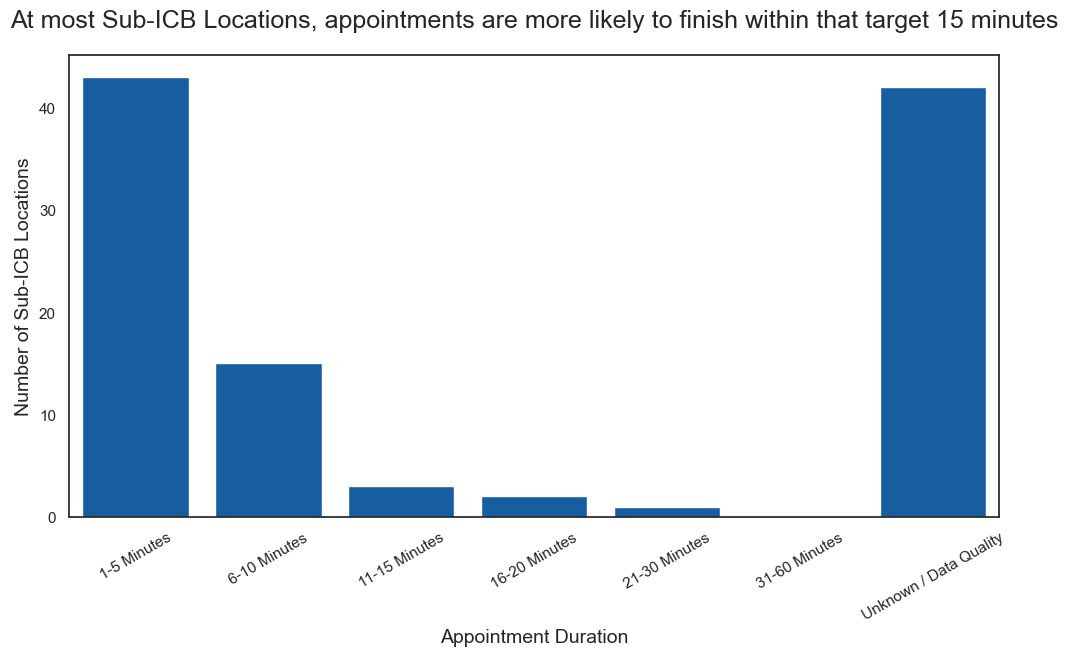

In [96]:
# Find most common appointnment duration in hospitals 
mode_hosp_duration_by_count_all = (mode_hosp_duration.groupby('actual_duration')['count']
                               .count()
                               .reset_index())

# Show information in barplot
fig10, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=mode_hosp_duration_by_count_all, x='actual_duration', y='count',
            color='#005EB8')

# Title & axis
plt.title('At most Sub-ICB Locations, appointments are more likely to finish within that target 15 minutes', fontsize=18, pad=20)
plt.xlabel('Appointment Duration', fontsize=14)
plt.ylabel('Number of Sub-ICB Locations', fontsize=14)
plt.xticks(rotation=30)

plt.show()

In [97]:
fig10.savefig('fig10_At most Sub-ICB Locations, appointments are more likely to finish within that target 15 minutes', dpi=300, bbox_inches='tight')

<span style="color:brown"><b>Note: Using unknown data isn't really helping understand what we do know, so use known data counts to give us informed and credible insights </b></span>

In [98]:
# Define known data in appointment durations
durations_order = ['1-5 Minutes','6-10 Minutes','11-15 Minutes','16-20 Minutes','21-30 Minutes','31-60 Minutes']

# Filter only known durations
mode_hosp_duration_clean = mode_hosp_duration[mode_hosp_duration['actual_duration'].isin(durations_order)]

# Count number of hospitals per most popular duration
mode_hosp_duration_by_count_known = (mode_hosp_duration_clean.groupby('actual_duration')['count']
                                     .count()
                                     .reset_index())

# Remove unknown data
mode_hosp_duration_by_count_known = mode_hosp_duration_by_count_known[
    mode_hosp_duration_by_count_known['actual_duration'] != 'Unknown / Data Quality']

# View output
mode_hosp_duration_by_count_known

,actual_duration,count
0,1-5 Minutes,43
1,6-10 Minutes,15
2,11-15 Minutes,3
3,16-20 Minutes,2
4,21-30 Minutes,1
5,31-60 Minutes,0


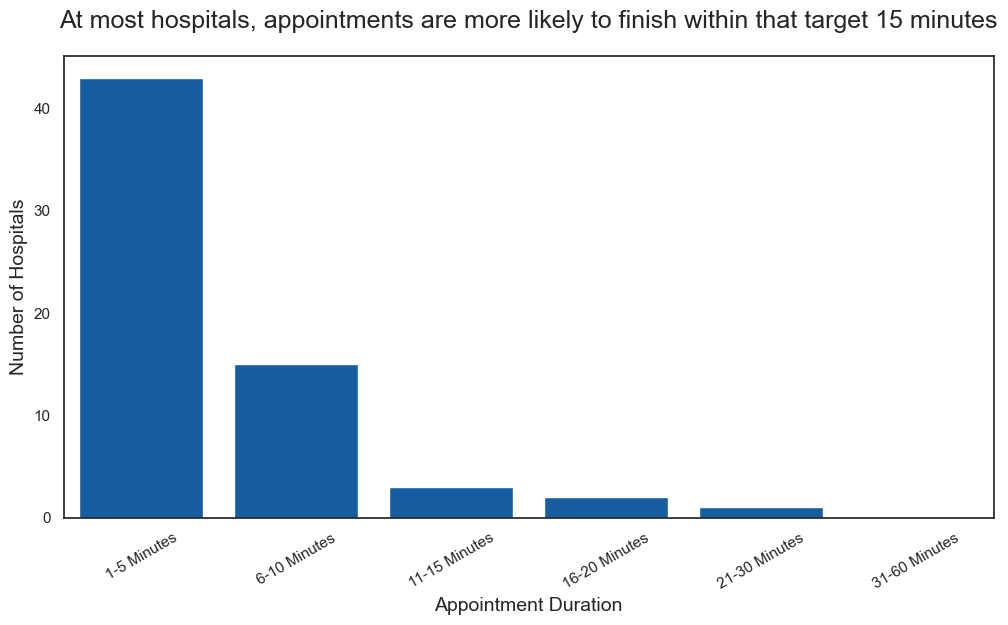

In [99]:
# Show information in barplot
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=mode_hosp_duration_by_count_known, x='actual_duration', y='count', order=durations_order,
            color='#005EB8')

# Title & axis
plt.title('At most hospitals, appointments are more likely to finish within that target 15 minutes', fontsize=18, pad=20)
plt.xlabel('Appointment Duration', fontsize=14)
plt.ylabel('Number of Hospitals', fontsize=14)
plt.xticks(rotation=30)

plt.show()

>**What hospitals/areas are underperforming or being stretched?**

In [100]:
# Which hospitals (areas) overrun recommended targets
# Define above targets
above_targets = ['16-20 Minutes', '21-30 Minutes']

# Filter rows that exceed the targets
over_target = mode_hosp_duration[mode_hosp_duration['actual_duration'].isin(above_targets)]

# View output
over_target

,sub_icb_location_name,actual_duration,count
74,NHS Cheshire and Merseyside ICB - 01J,21-30 Minutes,156
297,NHS Humber and North Yorkshire ICB - 03F,16-20 Minutes,212
710,NHS West Yorkshire ICB - 02T,16-20 Minutes,206


>**Top 10 hospitals with highest unplanned/walk-in activity**

In [101]:
# Create subtable with only unplanned/walk-in activity
nat_cat_unplanned_walk_only = nc[nc['national_category'].isin(nc_appointment_type_unplanned)]

# Order hospitals by highest count of specified activity - showing top 10
nat_cat_unplanned_walk_only_hopsitals = (nat_cat_unplanned_walk_only.groupby('sub_icb_location_name')['count_of_appointments']
                                         .sum()
                                         .reset_index()
                                         .sort_values('count_of_appointments', ascending=False)
                                         .head(10))
nat_cat_unplanned_walk_only_hopsitals

,sub_icb_location_name,count_of_appointments
76,NHS North West London ICB - W2U3Z,183022
104,NHS West Yorkshire ICB - 36J,131762
65,NHS Norfolk and Waveney ICB - 26A,130286
36,NHS Hampshire and Isle Of Wight ICB - D9Y0V,118732
87,NHS South Yorkshire ICB - 03N,108085
20,NHS Derby and Derbyshire ICB - 15M,105784
8,NHS Cambridgeshire and Peterborough ICB - 06H,103101
21,NHS Devon ICB - 15N,97372
22,NHS Dorset ICB - 11J,89283
79,NHS Nottingham and Nottinghamshire ICB - 52R,86190


<span style="color:purple"><b>Insight: NHS North West London ICB - W2U3Z is by far the most in demand hospital for unplanned/walk-in activity </b></span>

In [102]:
# Order hospitals by highest count of specified activity - showing top 10
nat_cat_unplanned_walk_only_hopsitals_lowest = (nat_cat_unplanned_walk_only.groupby('sub_icb_location_name')['count_of_appointments']
                                         .sum()
                                         .reset_index()
                                         .sort_values('count_of_appointments', ascending=False)
                                         .tail(10))
nat_cat_unplanned_walk_only_hopsitals_lowest

,sub_icb_location_name,count_of_appointments
88,NHS Staffordshire and Stoke-on-Trent ICB - 04Y,3539
78,NHS Nottingham and Nottinghamshire ICB - 02Q,3094
9,NHS Cheshire and Merseyside ICB - 01F,2480
64,NHS Mid and South Essex ICB - 99G,2193
69,NHS North East and North Cumbria ICB - 00N,1547
12,NHS Cheshire and Merseyside ICB - 01V,1514
50,NHS Lancashire and South Cumbria ICB - 00X,595
52,NHS Lancashire and South Cumbria ICB - 01E,529
55,NHS Lancashire and South Cumbria ICB - 02M,337
26,NHS Greater Manchester ICB - 00V,194


<span style="color:purple"><b>Insight: Northern UK hospitals experience least demand in unplanned/walk-in activity </b></span>

>**Average appointment time by month**

In [103]:
appointment_time_midpoints = {
    '1-5 Minutes': 3,
    '6-10 Minutes': 8,
    '11-15 Minutes': 13,
    '16-20 Minutes': 18,
    '21-30 Minutes': 25.5,
    '31-60 Minutes': 45.5}

# Create copy of ad DataFrame for new calculations 
ad_copy = ad.copy()

# Map midpoint values
ad_copy['appointment_time_midpoints'] = ad_copy['actual_duration'].map(appointment_time_midpoints)

# Extract month
ad_copy['appointment_month'] = pd.to_datetime(ad_copy['appointment_date']).dt.to_period('M')

# Count appointments per month
appointment_time_count_month = (ad_copy.groupby('appointment_month')['appointment_time_midpoints']
                                .count()
                                .reset_index()
                                .rename(columns={'appointment_time_midpoints': 'appointment_count'}))

# Sum of appointment times per month
appointment_time_month_sum = (ad_copy.groupby('appointment_month')['appointment_time_midpoints']
                              .sum()
                              .reset_index()
                              .rename(columns={'appointment_time_midpoints': 'appointment_time_sum'}))

# Merge count and sum
appointment_time_month_sum = appointment_time_month_sum.merge(
    appointment_time_count_month, on='appointment_month')

# Compute average
appointment_time_month_sum['average_appointment_time'] = (
    appointment_time_month_sum['appointment_time_sum'] / appointment_time_month_sum['appointment_count'])

print(appointment_time_month_sum.head())
print(appointment_time_month_sum.dtypes)

  appointment_month  appointment_time_sum  appointment_count  \
0           2021-08              191078.0              10256   
1           2021-09              206864.0              11098   
2           2021-10              203641.0              10927   
3           2021-11              214547.0              11499   
4           2021-12              197754.5              10604   

   average_appointment_time  
0                 18.630850  
1                 18.639755  
2                 18.636497  
3                 18.657883  
4                 18.649048  
appointment_month           period[M]
appointment_time_sum          float64
appointment_count               int64
average_appointment_time      float64
dtype: object


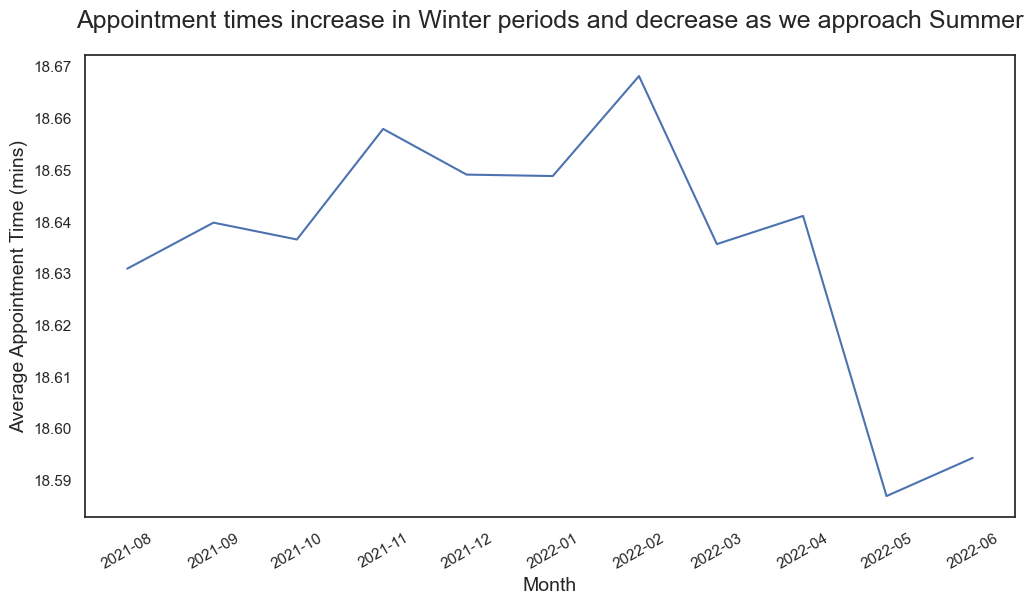

In [104]:
# Convert appointment_month to datetime for lineplot
appointment_time_month_sum['appointment_month'] = appointment_time_month_sum['appointment_month'].dt.to_timestamp()

# Show information in barplot
fig8, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=appointment_time_month_sum, x='appointment_month', y='average_appointment_time',
            palette='#005EB8')

# Title & axis
plt.title('Appointment times increase in Winter periods and decrease as we approach Summer', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Appointment Time (mins)', fontsize=14)
plt.xticks(rotation=30)

plt.show()

In [105]:
fig8.savefig('fig8_Appointment times increase in Winter periods and decrease as we approach Summer', dpi=300, bbox_inches='tight')

>**Average appointment times for best and worst performing hospitals**

In [106]:
# Calculate average appointment time per hospital per month
appointment_avg_by_hospital = (ad_copy.groupby(['sub_icb_location_name', 'appointment_month'])['appointment_time_midpoints']
                               .mean()
                               .reset_index()
                               .rename(columns={'appointment_time_midpoints': 'average_appointment_time'})
                               .sort_values(by=['sub_icb_location_name', 'appointment_month'], ascending=True))

appointment_avg_by_hospital.dtypes

# Convert Period to timestamp (for plotting)
appointment_avg_by_hospital['appointment_month'] = appointment_avg_by_hospital['appointment_month'].dt.to_timestamp()

# Display result
print(appointment_avg_by_hospital.head())

# Identify highest and lowest
highest_hospital = appointment_avg_by_hospital.iloc[0]['sub_icb_location_name']
lowest_hospital = appointment_avg_by_hospital .iloc[-1]['sub_icb_location_name']

print("Highest:", highest_hospital)
print("Lowest:", lowest_hospital)

                               sub_icb_location_name appointment_month  \
0  NHS Bath and North East Somerset Swindon and W...        2022-01-01   
1  NHS Bath and North East Somerset Swindon and W...        2022-02-01   
2  NHS Bath and North East Somerset Swindon and W...        2022-03-01   
3  NHS Bedfordshire Luton and Milton Keynes ICB -...        2021-12-01   
4  NHS Bedfordshire Luton and Milton Keynes ICB -...        2022-01-01   

   average_appointment_time  
0                 18.506536  
1                 18.570953  
2                 18.869565  
3                 18.833333  
4                 18.798722  
Highest: NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G
Lowest: NHS West Yorkshire ICB - X2C4Y


>**Comparing hospitals in London and their appointment times**

<Axes: xlabel='appointment_month', ylabel='average_appointment_time'>

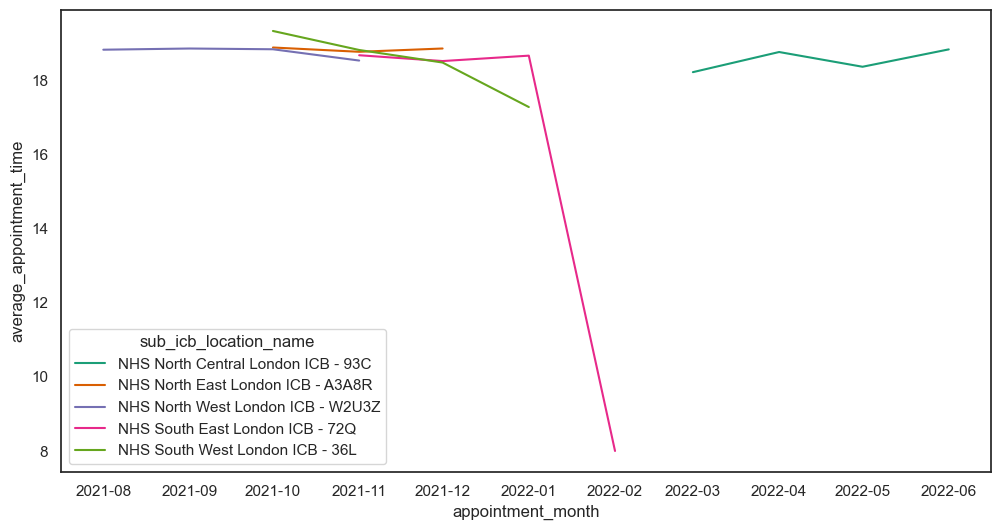

In [107]:
#Identify locations in London
appointment_avg_by_hospital_london = appointment_avg_by_hospital[appointment_avg_by_hospital['sub_icb_location_name']
.str.contains('London', case=False, na=False)]

# Hospitals in London
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(
    data=appointment_avg_by_hospital_london,
    x='appointment_month',
    y='average_appointment_time',
    hue='sub_icb_location_name',
    palette='Dark2')

<span style="color:brown"><b>Note: Hard to read and shows incomplete data - not a usable graph </b></span>

>**Find what are the most popular national category i.e. context type for each service setting**

<span style="color:brown"><b>Note: Understanding which types of appointments are managed by each service role helps reveal patterns in demand and clinical expertise. These insights can inform decisions on workforce planning and resource allocation. </b></span>

In [108]:
# Define service_settings to include - removing unmapped and inconsistent mapping
valid_national_categories = ['Care Home Needs Assessment & Personalised Care and Support Planning',
                             'Care Home Visit',
                             'Clinical Triage',
                             'General Consultation Acute',
                             'General Consultation Routine',
                             'Group Consultation and Group Education',
                             'Home Visit',
                             'Non-contractual chargeable work',
                             'Patient contact during Care Home Round',
                             'Planned Clinical Procedure',
                             'Planned Clinics',
                             'Service provided by organisation external to the practice',
                             'Social Prescribing Service',
                             'Structured Medication Review',
                             'Unplanned Clinical Activity',
                             'Walk-in']

# Filter the DataFrame to include only valid service settings
nc_valid_national_categories = nc[nc['national_category'].isin(valid_national_categories)]

# Extract relevant information
nat_cat_demand_service_setting = (nc_valid_national_categories.groupby(['service_setting', 'national_category'])['count_of_appointments']
                                  .sum()
                                  .reset_index()
                                  .sort_values(by=['service_setting', 'count_of_appointments'], ascending=True))

nat_cat_demand_service_setting.head()


,service_setting,national_category,count_of_appointments
5,Extended Access Provision,Group Consultation and Group Education,648
7,Extended Access Provision,Non-contractual chargeable work,1830
0,Extended Access Provision,Care Home Needs Assessment & Personalised Care...,2798
8,Extended Access Provision,Patient contact during Care Home Round,3209
6,Extended Access Provision,Home Visit,5071


In [109]:
# Split data per service_setting  
nat_cat_demand_service_setting_EAP = nat_cat_demand_service_setting[
    nat_cat_demand_service_setting['service_setting'] == 'Extended Access Provision']

nat_cat_demand_service_setting_GP = nat_cat_demand_service_setting[
    nat_cat_demand_service_setting['service_setting'] == 'General Practice']

nat_cat_demand_service_setting_other = nat_cat_demand_service_setting[
    nat_cat_demand_service_setting['service_setting'] == 'Other']

nat_cat_demand_service_setting_pck = nat_cat_demand_service_setting[
    nat_cat_demand_service_setting['service_setting'] == 'Primary Care Network']

# Identify highest and lowest for each service setting
highest_EAP = nat_cat_demand_service_setting_EAP.iloc[0]['national_category'] 
lowest_EAP = nat_cat_demand_service_setting_EAP.iloc[-1]['national_category']

print("Most common appointment category for Extended Access Provision:", highest_EAP)
print("Least common appointment category for Extended Access Provision:", lowest_EAP)

highest_GP = nat_cat_demand_service_setting_GP.iloc[0]['national_category'] 
lowest_GP = nat_cat_demand_service_setting_GP.iloc[-1]['national_category']

print("Most common appointment category for General Practice:", highest_GP)
print("Least common appointment category for General Practice:", lowest_GP)

highest_other = nat_cat_demand_service_setting_other.iloc[0]['national_category'] 
lowest_other = nat_cat_demand_service_setting_other.iloc[-1]['national_category']

print("Most common appointment category for General Practice:", highest_other)
print("Least common appointment category for General Practice:", lowest_other)

highest_pck = nat_cat_demand_service_setting_pck.iloc[0]['national_category'] 
lowest_pck = nat_cat_demand_service_setting_pck.iloc[-1]['national_category']

print("Most common appointment category for General Practice:", highest_other)
print("Least common appointment category for General Practice:", lowest_other)

Most common appointment category for Extended Access Provision: Group Consultation and Group Education
Least common appointment category for Extended Access Provision: General Consultation Acute
Most common appointment category for General Practice: Group Consultation and Group Education
Least common appointment category for General Practice: General Consultation Routine
Most common appointment category for General Practice: Group Consultation and Group Education
Least common appointment category for General Practice: General Consultation Routine
Most common appointment category for General Practice: Group Consultation and Group Education
Least common appointment category for General Practice: General Consultation Routine


<span style="color:purple"><b>Insight, or lack of: All service setting groups show same top and bottom appointment categories so this doesn't show much </b></span>

In [110]:
# Extended Access Provision (EAP)
top3_EAP = nat_cat_demand_service_setting_EAP.head(3)['national_category'].tolist()
bottom3_EAP = nat_cat_demand_service_setting_EAP.tail(3)['national_category'].tolist()

print("EAP")
print("Top 3:", top3_EAP)
print("Bottom 3:", bottom3_EAP)

# General Practice (GP)
top3_GP = nat_cat_demand_service_setting_GP.head(3)['national_category'].tolist()
bottom3_GP = nat_cat_demand_service_setting_GP.tail(3)['national_category'].tolist()

print("Top 3 appointment categories for General Practice:", top3_GP)
print("Bottom 3 appointment categories for General Practice:", bottom3_GP)

# Other
top3_other = nat_cat_demand_service_setting_other.head(3)['national_category'].tolist()
bottom3_other = nat_cat_demand_service_setting_other.tail(3)['national_category'].tolist()

print("Top 3 appointment categories for Other:", top3_other)
print("Bottom 3 appointment categories for Other:", bottom3_other)

# PCK
top3_pck = nat_cat_demand_service_setting_pck.head(3)['national_category'].tolist()
bottom3_pck = nat_cat_demand_service_setting_pck.tail(3)['national_category'].tolist()

print("Top 3 appointment categories for PCK:", top3_pck)
print("Bottom 3 appointment categories for PCK:", bottom3_pck)

EAP
Top 3: ['Group Consultation and Group Education', 'Non-contractual chargeable work', 'Care Home Needs Assessment & Personalised Care and Support Planning']
Bottom 3: ['Clinical Triage', 'General Consultation Routine', 'General Consultation Acute']
Top 3 appointment categories for General Practice: ['Group Consultation and Group Education', 'Non-contractual chargeable work', 'Social Prescribing Service']
Bottom 3 appointment categories for General Practice: ['Clinical Triage', 'General Consultation Acute', 'General Consultation Routine']
Top 3 appointment categories for Other: ['Group Consultation and Group Education', 'Social Prescribing Service', 'Care Home Needs Assessment & Personalised Care and Support Planning']
Bottom 3 appointment categories for Other: ['Clinical Triage', 'General Consultation Acute', 'General Consultation Routine']
Top 3 appointment categories for PCK: ['Group Consultation and Group Education', 'Non-contractual chargeable work', 'Walk-in']
Bottom 3 appointm

<span style="color:brown"><b>Note: Unsure of how to write script to plot this information, therefore create a table to show top 3 and bottom 3 </b></span>

In [111]:
# Top 3 in a table
top3_dict = {
    'EAP': ['Group Consultation and Group Education', 'Non-contractual chargeable work', 'Care Home Needs Assessment & Personalised Care and Support Planning'],
    'General Practice': ['Group Consultation and Group Education', 'Non-contractual chargeable work', 'Social Prescribing Service'],
    'Other': ['Group Consultation and Group Education', 'Social Prescribing Service', 'Care Home Needs Assessment & Personalised Care and Support Planning'],
    'PCK': ['Group Consultation and Group Education', 'Non-contractual chargeable work', 'Walk-in']}

# Convert to DataFrame
top3_df = pd.DataFrame(top3_dict)

top3_df.head()

,EAP,General Practice,Other,PCK
0,Group Consultation and Group Education,Group Consultation and Group Education,Group Consultation and Group Education,Group Consultation and Group Education
1,Non-contractual chargeable work,Non-contractual chargeable work,Social Prescribing Service,Non-contractual chargeable work
2,Care Home Needs Assessment & Personalised Care...,Social Prescribing Service,Care Home Needs Assessment & Personalised Care...,Walk-in


In [112]:
# Bottom 3 in a table
bottom3_dict = {
    'EAP': ['Clinical Triage', 'General Consultation Routine', 'General Consultation Acute'],
    'General Practice': ['Clinical Triage', 'General Consultation Acute', 'General Consultation Routine'],
    'Other': ['Clinical Triage', 'General Consultation Acute', 'General Consultation Routine'],
    'PCK': ['General Consultation Acute', 'Planned Clinics', 'General Consultation Routine']}

# Convert to DataFrame
bottom3_df = pd.DataFrame(bottom3_dict)

# Display the DataFrame
bottom3_df.head()

,EAP,General Practice,Other,PCK
0,Clinical Triage,Clinical Triage,Clinical Triage,General Consultation Acute
1,General Consultation Routine,General Consultation Acute,General Consultation Acute,Planned Clinics
2,General Consultation Acute,General Consultation Routine,General Consultation Routine,General Consultation Routine


<span style="color:purple"><b>Insight: Overall, the pattern suggests that  service settings handle broadly similar types of appointments, with small meaningful variations in activity mix. The same types of appointments are proving to be the most in demand ones across the board. </b></span>

>**Relationship between time to be seen from appointment and appointment time**

# This is a problem area - i am mapping straight into ar datafram and i shouldn't create a copy first

In [113]:
# Define book to appt time midpoint
time_between_book_and_appointment_midpoint = {'Same Day': 0, '1 Day': 1, '2 to 7 Days': 4.5,
                                              '8  to 14 Days': 11, '15  to 21 Days': 18,
                                              '22  to 28 Days': 25, 'More than 28 Days': 29}

# appointment_time_midpoints and ad_copy already defined/created

# Manke copy of ar dataset to add new calculation columns to table
ar_copy = ar.copy()

# Map midpoints into DataFrames
ar_copy['time_to_be_seen_mid'] = ar['time_between_book_and_appointment'].map(time_between_book_and_appointment_midpoint)
ad_copy['appointment_duration_mid'] = ad['actual_duration'].map(appointment_time_midpoints)


# Extract month from ad's appointment_date' as Timestamp (having checked datetime attribute
ad_copy['appointment_month'] = ad_copy['appointment_date'].dt.to_period('M').dt.to_timestamp()

# weighted average of appointment_duration_mid by count_of_appointments
# Multiply duration midpoint by count to get total minutes
ad_copy['duration_weighted'] = ad_copy['appointment_duration_mid'] * ad_copy['count_of_appointments']

# Group by ICB and month, summing totals
ad_monthly = ad_copy.groupby(['icb_ons_code', 'appointment_month'], as_index=False).agg({'duration_weighted': 'sum',
                                                                                    'count_of_appointments': 'sum'})

# Ahead of merge with ar DataFrame, make appointment_month same datatype (period[M])
ad_monthly['appointment_month'] = ad_monthly['appointment_month'].dt.to_period('M')

#View dataset
print(ad_monthly.dtypes)
ad_monthly.head()

icb_ons_code                object
appointment_month        period[M]
duration_weighted          float64
count_of_appointments        int64
dtype: object


,icb_ons_code,appointment_month,duration_weighted,count_of_appointments
0,E54000008,2021-08,13936716.5,1409244
1,E54000008,2021-09,5254993.0,560078
2,E54000008,2021-10,12377483.0,1297201
3,E54000008,2021-11,13809632.0,1426502
4,E54000008,2021-12,3479068.0,372952


In [114]:
# Compute the weighted average duration per ICB-month
ad_monthly['appointment_duration_mid'] = (
    ad_monthly['duration_weighted'] / ad_monthly['count_of_appointments'])

# Drop helper column
ad_monthly = ad_monthly.drop(columns=['duration_weighted'])

# Merge the two DataFrames
arad_book_appt_duration_relation = ar_copy.merge(
    ad_monthly,
    on=['icb_ons_code', 'appointment_month'],
    how='inner')

# --- Check result ---
print(arad_book_appt_duration_relation.head())
print(arad_book_appt_duration_relation.shape)

arad_book_appt_duration_relation.head()

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2021-08           Attended       GP     Face-to-Face   
1    E54000034           2021-08           Attended       GP     Face-to-Face   
2    E54000034           2021-08           Attended       GP     Face-to-Face   
3    E54000034           2021-08           Attended       GP     Face-to-Face   
4    E54000034           2021-08           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments_x  \
0                             1 Day                     6553   
1                    15  to 21 Days                     2390   
2                       2 to 7 Days                    10547   
3                    22  to 28 Days                      937   
4                     8  to 14 Days                     4961   

   time_to_be_seen_mid  count_of_appointments_y  appointment_duration_mid  
0                  1.0                   350695     

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments_x,time_to_be_seen_mid,count_of_appointments_y,appointment_duration_mid
0,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553,1.0,350695,10.314772
1,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390,18.0,350695,10.314772
2,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547,4.5,350695,10.314772
3,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937,25.0,350695,10.314772
4,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961,11.0,350695,10.314772


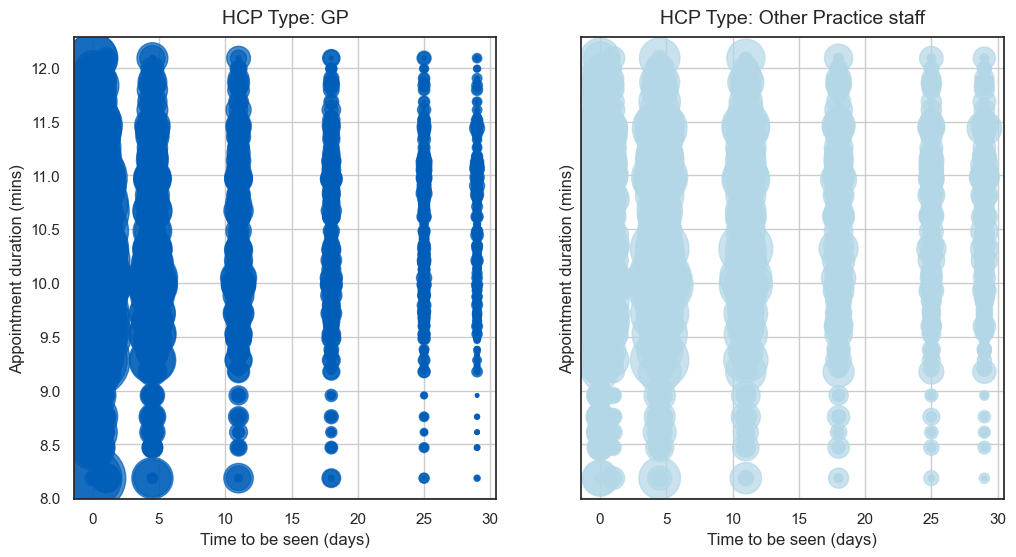

In [115]:
# Filter out the 'Unknown' HCP type
hcp_arad_book_appt_duration_relation = arad_book_appt_duration_relation[arad_book_appt_duration_relation['hcp_type'] != 'Unknown']

# Get unique remaining HCP types
hcp_types = hcp_arad_book_appt_duration_relation['hcp_type'].unique()

# Create one scatter plot per HCP type
fig14, axes = plt.subplots(1, len(hcp_types), figsize=(12, 6), sharey=True)

for ax, hcp in zip(axes, hcp_types):
    subset = hcp_arad_book_appt_duration_relation[hcp_arad_book_appt_duration_relation['hcp_type'] == hcp]

    # Choose colour based on HCP type
    if hcp == 'GP':
        color = '#005eb8'
    elif hcp == 'Other Practice staff':
        color = '#B3D7E6'

    # Create scatter plot
    scatplot = ax.scatter(
        subset['time_to_be_seen_mid'],
        subset['appointment_duration_mid'],
        s=subset['count_of_appointments_x'] / 50,marker='o',
        alpha=0.7, color=color, label=hcp)

    # Titles and labels for each plot
    ax.set_title(f"HCP Type: {hcp}", fontsize=14, pad=10)
    ax.set_xlabel("Time to be seen (days)", fontsize=12)
    ax.set_ylabel("Appointment duration (mins)", fontsize=12)
    ax.grid(True)

plt.show()

In [116]:
fig14.savefig('fig14_Scatter_appointment duration and time to book relationship', dpi=300, bbox_inches='tight')

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [117]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [118]:
# Load the data set.
tt = pd.read_csv('tweets.csv')

# View the DataFrame.
tt.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [119]:
# Checking all data has accurately been read into Python
print(tt.shape)
print(tt.dtypes)

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


In [120]:
# Explore the metadata.
tt['tweet_metadata'][0]

"{'iso_language_code': 'en', 'result_type': 'recent'}"

<span style="color:brown"><b>Note: The tweet metadata indicates that all tweets are in English. This may introduce bias, as the NHS workforce is international and non-English tweets are excluded, meaning the data may not fully represent the true range of opinions or perceptions. The tweets are also “recent”; however, it is unclear what time frame this covers, whether it includes only the past few days, the last three months or a longer period.  </b></span>

In [121]:
# Check for NaN values
tt.isna().sum()

tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64

<span style="color:brown"><b>Note: Many tweets do not contain hashtags, and since including hashtags is not mandatory, these entries are still valid.  </b></span>

In [122]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.

- Retweets show what messages people chose to share,  this often means the tweet resonated with them or reflected their opinions.
- Favorites (and likes) show tweets that people agreed with or appreciated, even if they didn’t share them.
- So if you look only at tweets with high retweet or favorite counts, you can focus on the most influential or popular messages.

But then...
- The messages themselves usually contain much more detail, and limiting the analysis to only popular tweets introduces bias.
- Most tweets (in this data) have few or no retweets or likes, so ignoring them means missing out on a wide range of opinions and smaller voices.

While retweeted and favorited tweets can reveal what gains attention, analysing all tweets gives a more balanced and comprehensive understanding of shared perceptions and sentiment.

In [123]:
# Explore the data set.
print(tt['tweet_retweet_count'].sum())
print(tt['tweet_favorite_count'].sum())

10131
436


<span style="color:purple"><b>Insight: More tweets are reshared than favorited, suggesting an appetite for sharing information with peers and creating a collective community voice rather than just expressing a personal reaction. This may also reflect a desire to be seen engaging in popular or relevant discussions, and some tweets may be shared for visibility or debate rather than agreement.</b></span>

In [124]:
# Checking boolean retweet and favorite columns reflect retweet/favorite count status
print((tt['tweet_favorited'] == True).sum())
print((tt['tweet_retweeted'] == True).sum())

0
0


<span style="color:brown"><b>Note: The boolean columns (tweet_favorited, tweet_retweeted) don’t match the count columns. This may be because the data was collected without being logged in as the account owner, so the twitter API defaults these flags to false for privacy reasons. therefore, the count columns (tweet_retweet_count, tweet_favorite_count) are the reliable indicators of engagement, and the boolean columns will be ignored.  </b></span>

In [125]:
# Create a new DataFrame containing only the text (and other relavant columns)
tt_text = tt[["tweet_id", "tweet_full_text", "tweet_entities_hashtags", 
              "tweet_retweet_count", "tweet_favorite_count"]].reset_index()

# View the DataFrame.
tt_text.head()

,index,tweet_id,tweet_full_text,tweet_entities_hashtags,tweet_retweet_count,tweet_favorite_count
0,0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...",#Healthcare,0,0
1,1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"#PremiseHealth, #hiring",2,0
2,2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,#Healthcare,39,0
3,3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,#NEW,5,0
4,4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare",0,0


In [126]:
# Loop through the messages, and create a list of values containing the # symbol.
# Create an empty list to store hashtags
hashtags = []

# Loop through each row in the column
for hashtag_text in tt_text ['tweet_entities_hashtags']:
    # Only continue if the cell isn't empty
    if pd.notna(hashtag_text):
        # Split by comma as many have multiple hashtags
        for tag in hashtag_text.split(','):
            tag = tag.strip()  # remove spaces
            if '#' in tag:
                hashtags.append(tag)

In [127]:
# Display the first 30 records.
print(hashtags[:30])

['#Healthcare', '#PremiseHealth', '#hiring', '#Healthcare', '#NEW', '#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', '#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '#NEW', '#disparities', '#healthcare', '#alert', '#insurance', '#data', '#Healthcare']


In [128]:
# Convert the series to a DataFrame in preparation for visualisation.
hashtags_series = pd.Series(hashtags)

# Count number each hashtag
hashtag_counts = hashtags_series.value_counts().reset_index()
hashtag_counts.columns = ['hashtag', 'count']  

# Check dtypes and view output
print(hashtag_counts.dtypes)

# Display first few rows
hashtag_counts.head()

hashtag    object
count       int64
dtype: object


,hashtag,count
0,#healthcare,599
1,#Healthcare,198
2,#health,68
3,#HealthCare,47
4,#AI,45


<span style="color:brown"><b>Note: Consider the word itself, not its case. For example, 'healthcare' has appeared at least three times; when the word is the same, the meaning of the hashtag is the same.</b></span>

In [129]:
# Convert the series to a DataFrame in preparation for visualisation.
hashtags_series = pd.Series(hashtags).str.lower()

hashtag_counts = hashtags_series.value_counts().reset_index()
hashtag_counts.columns = ['hashtag', 'count']  

hashtag_counts.head()

,hashtag,count
0,#healthcare,844
1,#health,86
2,#ai,47
3,#medicine,42
4,#job,38


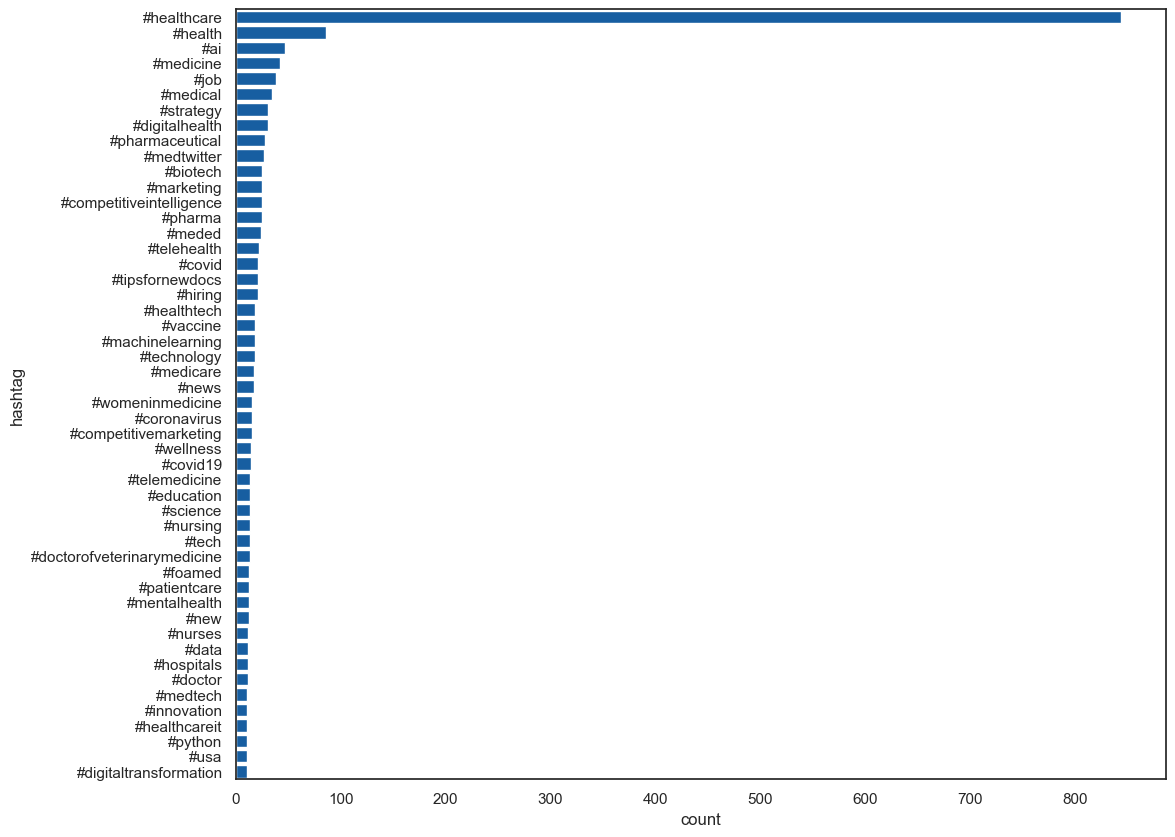

In [130]:
# Display records where the count is larger than 10.
hashtags_count_above_10 = hashtag_counts[hashtag_counts['count'] > 10]

# Create horiszontal barplot
fig_explore, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=hashtags_count_above_10, x='count', y='hashtag', color = '#005EB8')

plt.show()

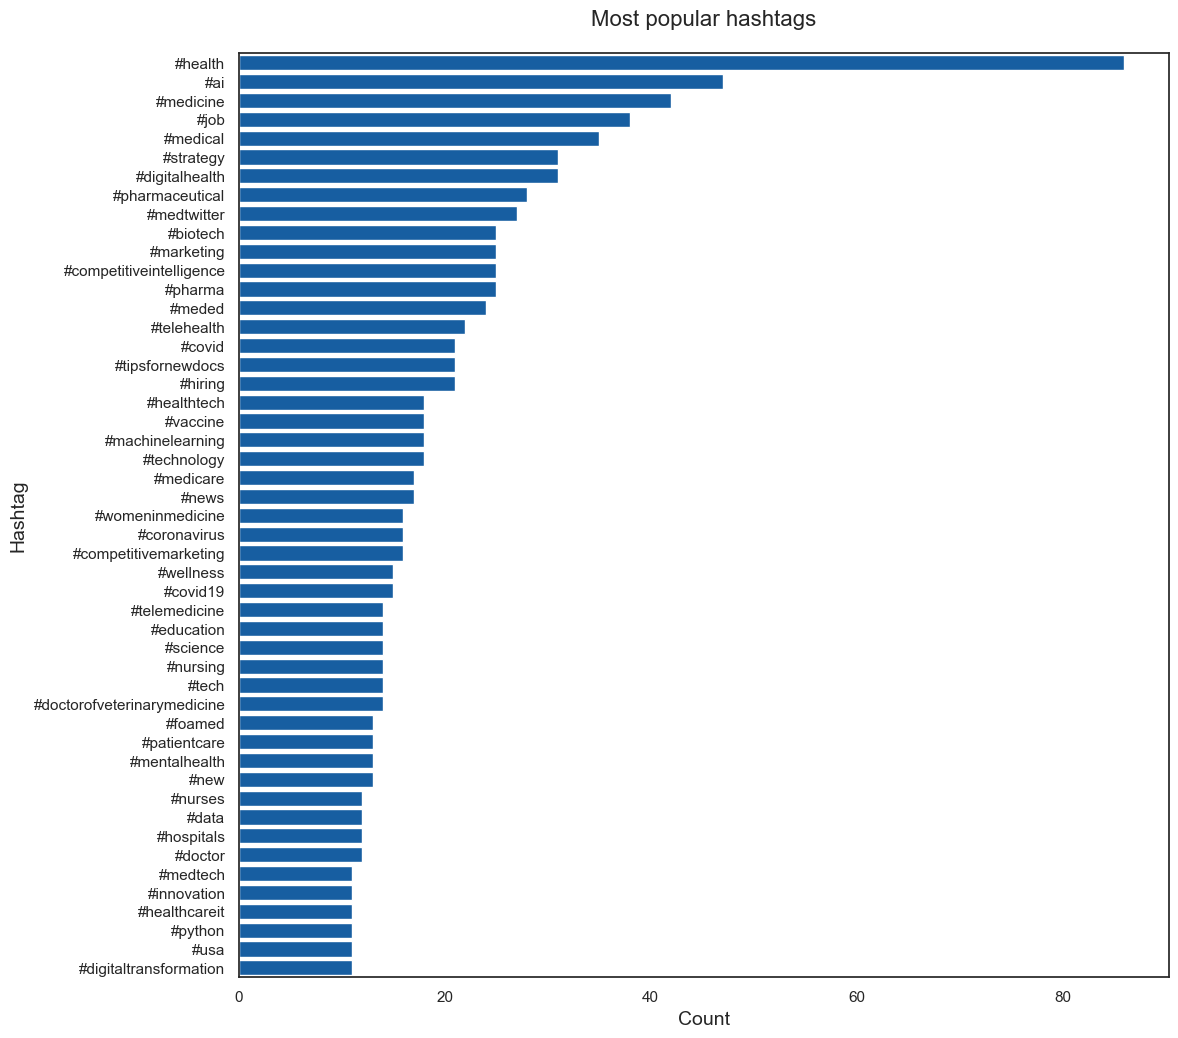

In [131]:
# Remove any overrepresented hashtags and create a seaborn barplot displaying the remaining most frequently used hashtags (#)
hashtags_count_above_10_no_healthcare = hashtags_count_above_10[hashtags_count_above_10['hashtag'] != '#healthcare']

# Create horizontal barplot
fig18, ax = plt.subplots(figsize=(12,12))
sns.barplot(data=hashtags_count_above_10_no_healthcare, x='count', y='hashtag', color = '#005EB8')

# Title and labels
plt.title('Most popular hashtags', fontsize=16, pad=20)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)

plt.show()

In [132]:
fig18.savefig('fig18_Most popular hashtag', dpi=300, bbox_inches='tight')

>**Checking common feelings with key words seen in data**

In [133]:
# Count tweets mentioning "work life balance" (case-insensitive)
wlb_count = tt_text['tweet_full_text'].str.contains('work-life balance', case=False, na=False).sum()
wlb_count

np.int64(4)

In [134]:
# Count tweets mentioning hiring (promo)
hiring_count = tt_text['tweet_full_text'].str.contains('hiring', case=False, na=False).sum()
hiring_count

np.int64(48)

In [135]:
# Count tweets mentioning public
public_count = tt_text['tweet_full_text'].str.contains('public', case=False, na=False).sum()
public_count

np.int64(33)

In [136]:
# Filter and display all tweets containing "public" (case-insensitive)
tweets_with_public = tt_text[tt_text['tweet_full_text'].str.contains('public', case=False, na=False)]
tweets_with_public.head()

,index,tweet_id,tweet_full_text,tweet_entities_hashtags,tweet_retweet_count,tweet_favorite_count
8,8,1567582442235789312,"RT @AlikaMD: Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or…",#healthcare,4,0
84,84,1567579049043832832,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...","#healthcare, #cdnpoli",4,18
89,89,1567578776497692675,"RT @ArcusLGBT: As the U.S. government seeks public input on a proposed #healthcare regulation, learn how this policy change can help ensure…",#healthcare,6,0
138,138,1567576311626960904,Poland is a good export market for Irish Lifesciencense companies with high demand for innovative products and services.\nPoland has :\n👩‍⚕️949 public hospitals\n👩‍⚕️560 private hospitals.\n👩‍⚕️47...,"#Lifescience, #healthcare",0,0
145,145,1567575766648455173,"RT @ArcusLGBT: As the U.S. government seeks public input on a proposed #healthcare regulation, learn how this policy change can help ensure…",#healthcare,6,0


<span style="color:purple"><b>Insight: 'Public' is often used as a powerful term to highlight declining trust in public health and the need for its restoration </b></span>

>**What tweets are most likely to be retweeted and favorites?**

In [137]:
#  Split multiple hashtags into separate rows
tt_text = tt_text.assign(Hashtag=tt_text['tweet_entities_hashtags'].str.split(',')).explode('Hashtag')

# Clean hashtags 
tt_text['hashtag'] = tt_text['Hashtag'].str.strip().str.lower()

# Aggregate total retweets and favorites by hashtag
hashtag_stats = tt_text.groupby('hashtag').agg(
    Total_Retweets=('tweet_retweet_count', 'sum'),
    Total_Favorites=('tweet_favorite_count', 'sum'),
    Tweet_Count=('tweet_id', 'count')).reset_index()

hashtag_stats.head()

,hashtag,Total_Retweets,Total_Favorites,Tweet_Count
0,#100daysofmlcode,90,5,10
1,#2022pbmi,0,0,1
2,#340b,7,0,1
3,#4ir,49,0,1
4,#5g,9,3,4


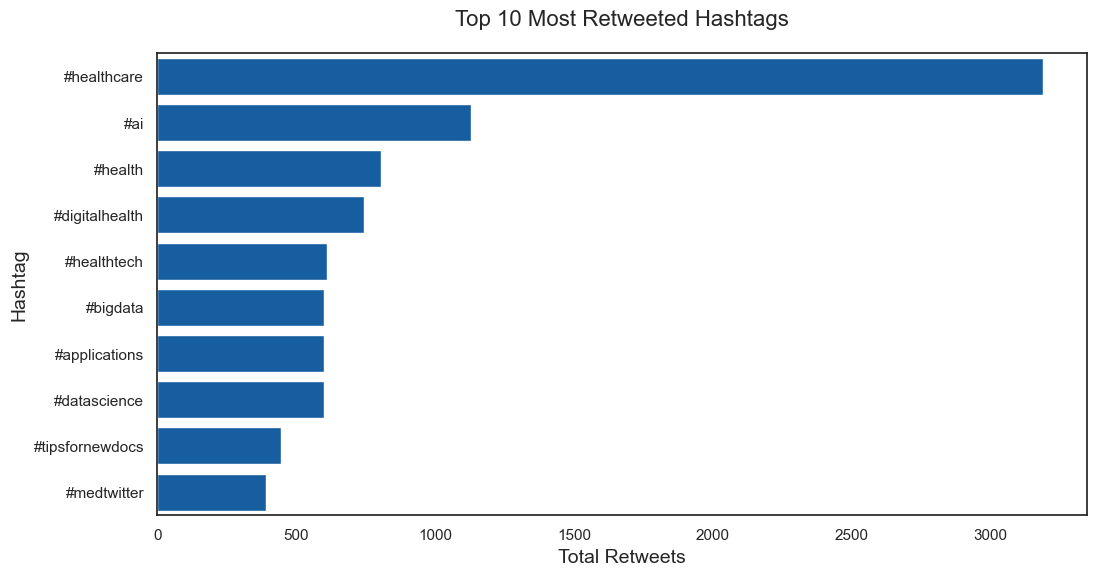

In [138]:
# Create horizontal barplot
# Take top 10 most retweeted hashtags
top10_retweeted = hashtag_stats.sort_values(by='Total_Retweets', ascending=False).head(10)

# Create horizontal barplot
fig19, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=top10_retweeted, x='Total_Retweets', y='hashtag', color='#005EB8')

# Title and labels
plt.title('Top 10 Most Retweeted Hashtags', fontsize=16, pad=20)
plt.xlabel('Total Retweets', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)

plt.show()

In [139]:
fig19.savefig('fig19_Top 10 Most Retweeted Hashtags', dpi=300, bbox_inches='tight')

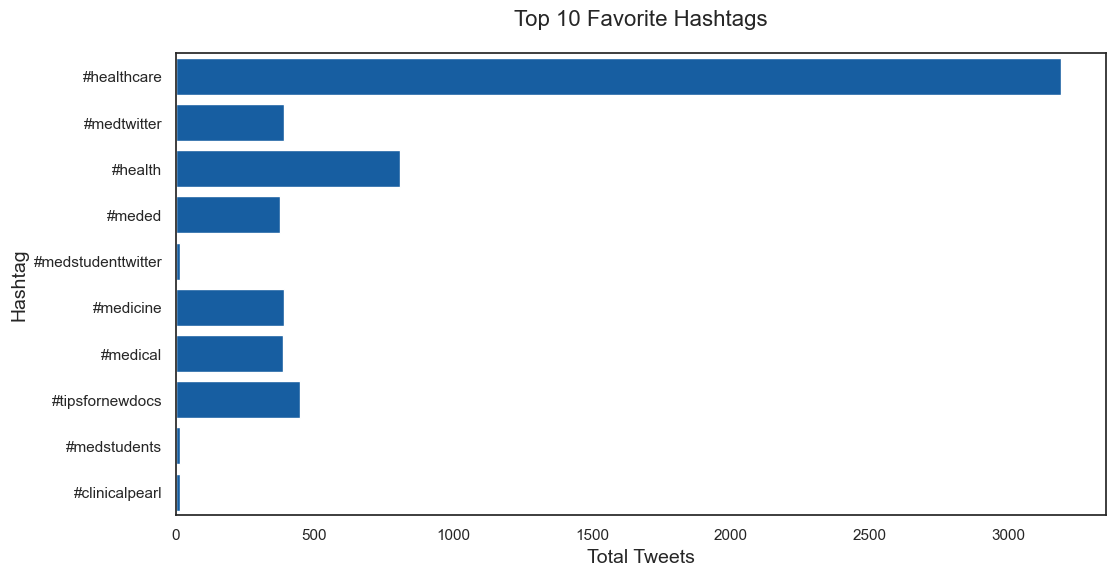

In [140]:
# Create horizontal barplot
# Take top 10 most favorites hashtags
top10_favorites= hashtag_stats.sort_values(by='Total_Favorites', ascending=False).head(10)

# Create horizontal barplot
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=top10_favorites, x='Total_Retweets', y='hashtag', color='#005EB8')

# Title and labels
plt.title('Top 10 Favorite Hashtags', fontsize=16, pad=20)
plt.xlabel('Total Tweets', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)

plt.show()

# 

# Assignment activity 6

### Make recommendations to the NHS. 

>**Question 1:** Should the NHS start looking at increasing staff levels? 

<span style="color:brown"><b>Note: Verifying three DataFrames to ensure data integrity, using shape to match rows and columns to original check in notebook </b></span>

In [141]:
print(ad.shape)
ad.head()

(137793, 8)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-08-02,16-20 Minutes,730


In [142]:
print(ar.shape)
ar.head()

(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [143]:
print(nc.shape)
nc.head()

(817394, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


>**Total appointments per sub-ICB per month**

In [146]:
# Agg 1 is Total appointments per sub-ICB per month (from ad)
# Collect days into month
ad_copy['appointment_month'] = ad_copy['appointment_date'].dt.to_period('M')

agg_sub_icb = (ad_copy.groupby(['sub_icb_location_code',  'sub_icb_location_name',  
                           'appointment_month', 'actual_duration'])['count_of_appointments']
               .sum()
               .reset_index())

agg_sub_icb.head()

,sub_icb_location_code,sub_icb_location_name,appointment_month,actual_duration,count_of_appointments
0,00L,NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G,2021-08,1-5 Minutes,0
1,00L,NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G,2021-08,6-10 Minutes,0
2,00L,NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G,2021-08,11-15 Minutes,0
3,00L,NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G,2021-08,16-20 Minutes,0
4,00L,NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G,2021-08,21-30 Minutes,0


<span style="color:brown"><b>Note: Find the hospitals that have the highest appointment counts </b></span>

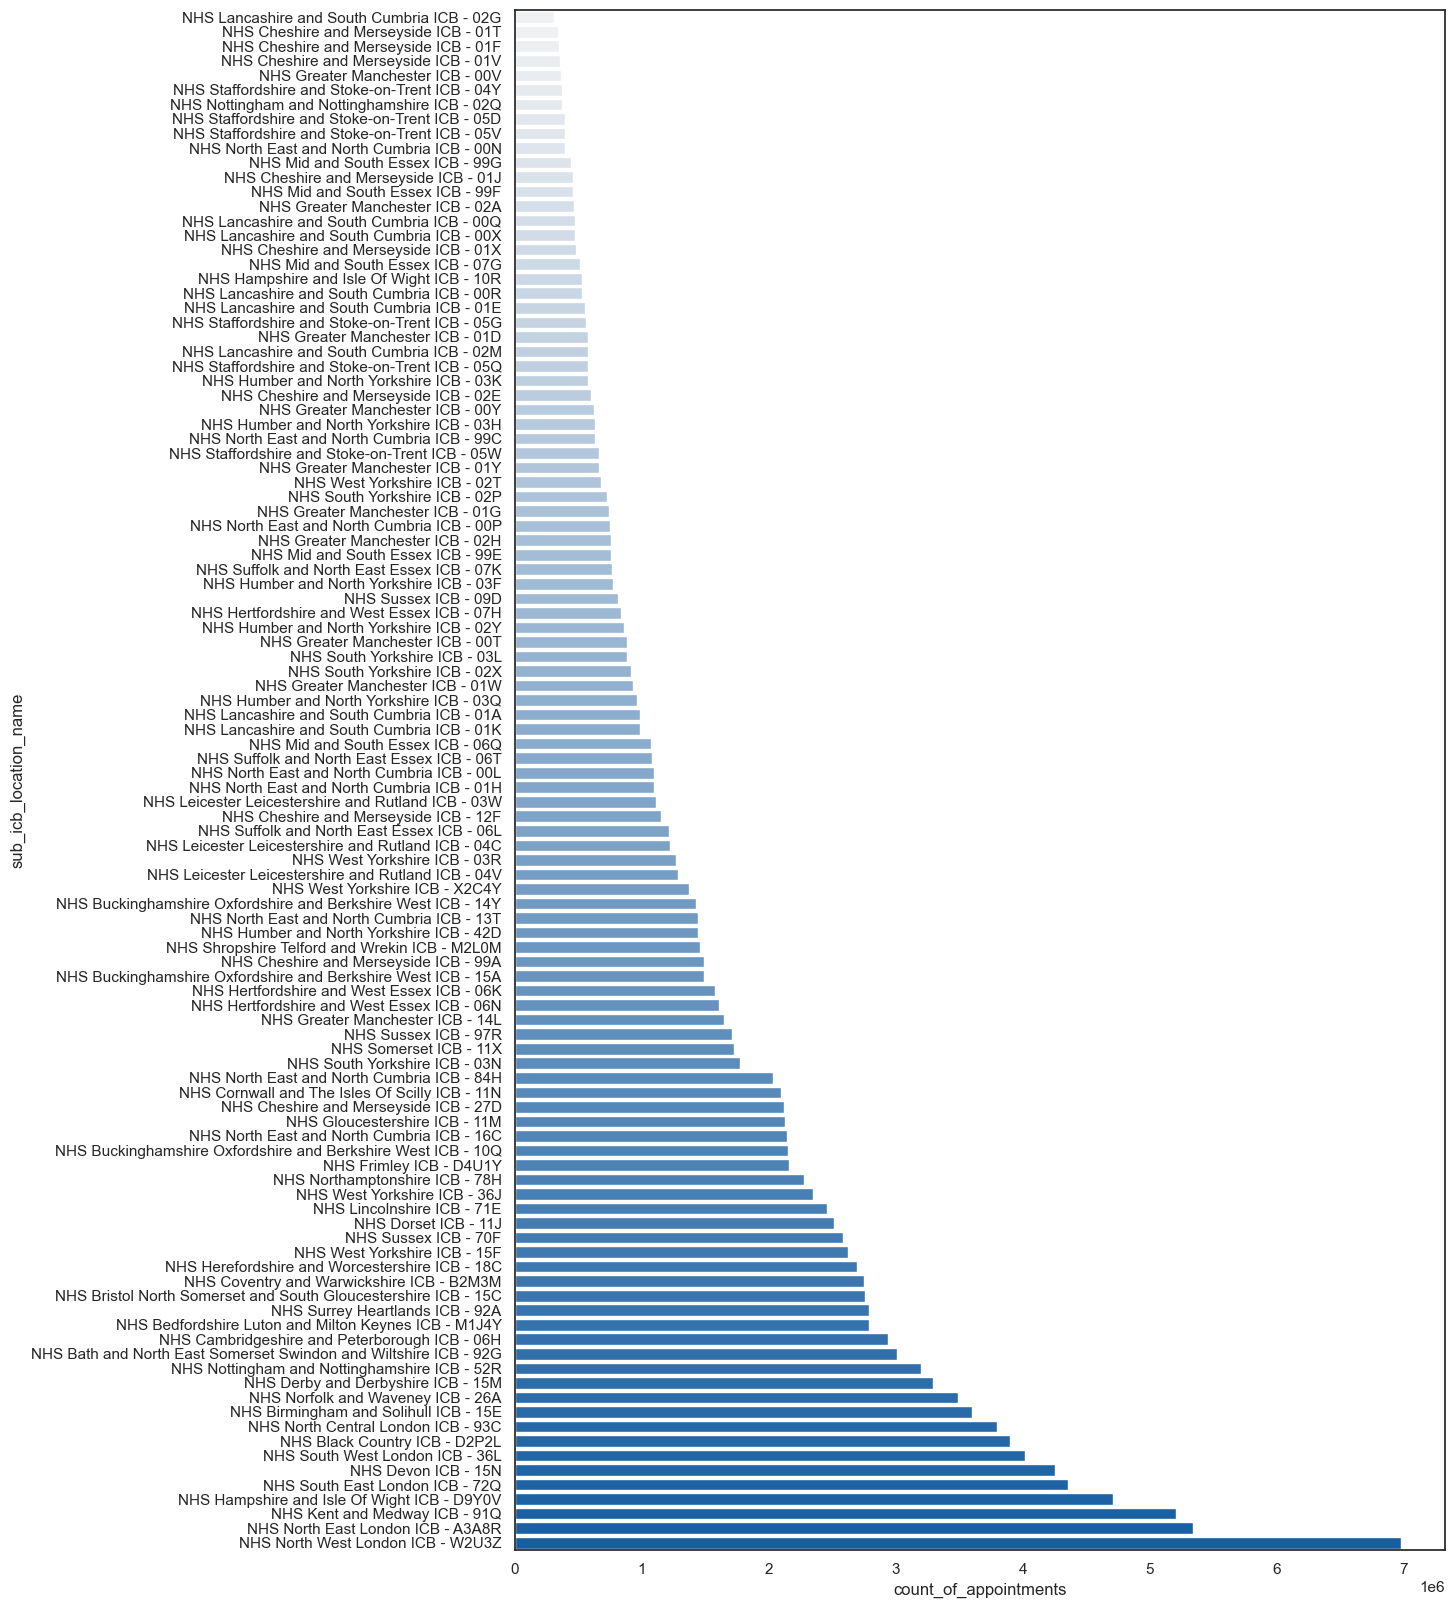

In [147]:
agg_sub_icb_annual = (agg_sub_icb.groupby('sub_icb_location_name')['count_of_appointments']
                      .sum().reset_index())

# Sort the data by count_of_appointments (ascending or descending)
agg_sub_icb_annual = agg_sub_icb_annual.sort_values('count_of_appointments', ascending=True)

# Create horizontal barplot with a gradient from light blue to your #005EB8
palette = sns.light_palette("#005EB8", n_colors=len(agg_sub_icb_annual), reverse=False)

fig_explore, ax = plt.subplots(figsize=(12,20))
sns.barplot(data=agg_sub_icb_annual, x='count_of_appointments',
             y='sub_icb_location_name', palette=palette)

plt.show()  

<span style="color:brown"><b>Note: Too large a graph - need to know top 10 and bottom 10 in demand hospitals </b></span>

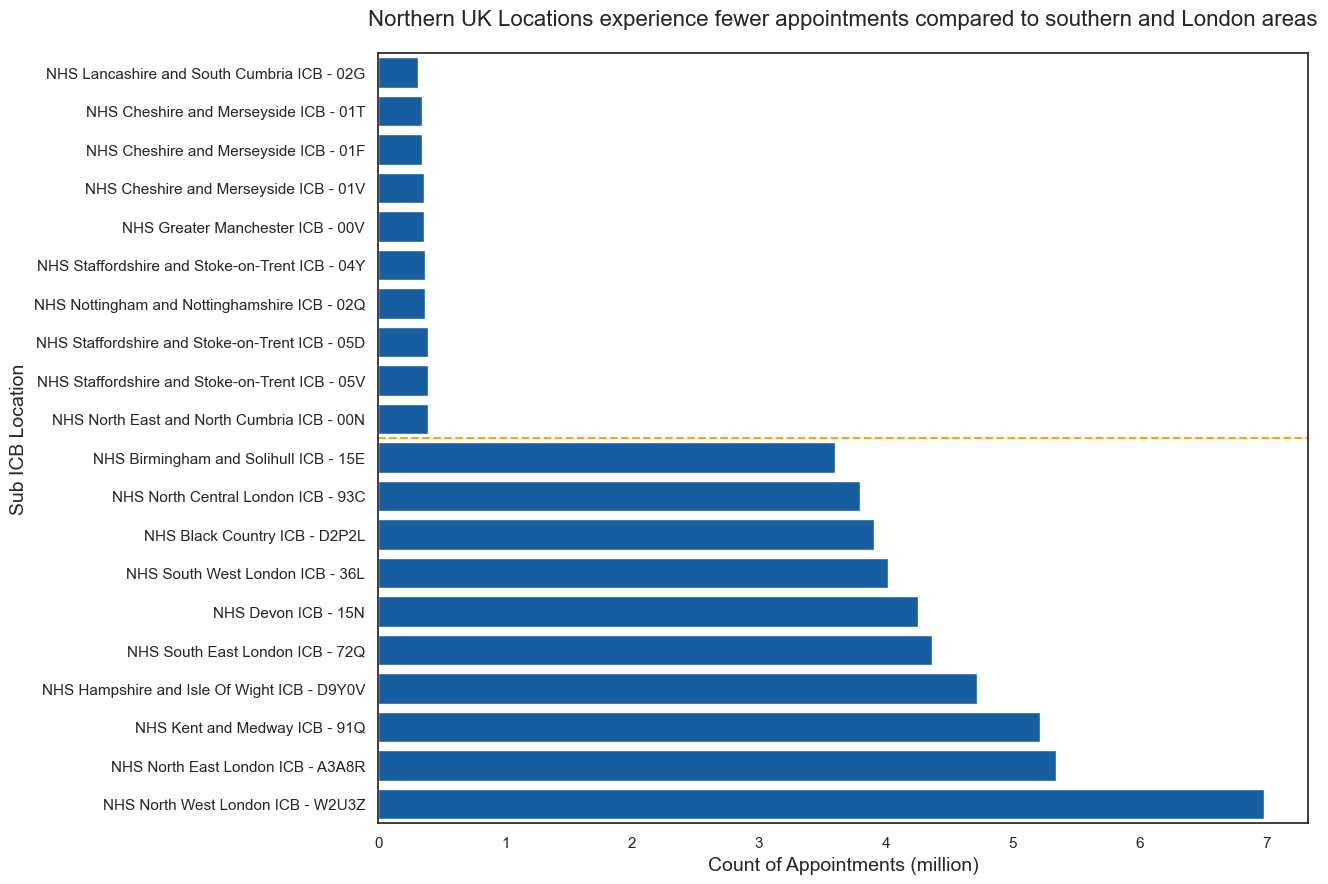

In [148]:
# Aggregate and sort
agg_sub_icb_annual_10 = (agg_sub_icb.groupby('sub_icb_location_name')['count_of_appointments']
                         .sum()  
                         .reset_index()
                         .sort_values('count_of_appointments', ascending=True))

# Select bottom 10 and top 10
bottom10 = agg_sub_icb_annual_10.head(10)
top10 = agg_sub_icb_annual_10.tail(10)

# Combine bottom and top 10 into a table
agg_sub_icb_annual_10_combined = pd.concat([bottom10, top10])

# Keep sorted for display
agg_sub_icb_annual_10_combined = agg_sub_icb_annual_10_combined.sort_values('count_of_appointments', ascending=True)

# Count in million adjust
agg_sub_icb_annual_10_combined['count_of_appointments_millions']=agg_sub_icb_annual_10_combined['count_of_appointments']/1e6

# Plot
fig9, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=agg_sub_icb_annual_10_combined, x='count_of_appointments_millions', y='sub_icb_location_name', color='#005EB8')

# Add dividing line between bottom 10 and top 10
divider_y = 9.5  # halfway between 10th and 11th bar
ax.axhline(divider_y, color='orange', linestyle='--')

# Title and labels
plt.title('Northern UK Locations experience fewer appointments compared to southern and London areas', fontsize=16, pad=20)
plt.xlabel('Count of Appointments (million)', fontsize=14)
plt.ylabel('Sub ICB Location', fontsize=14)

plt.show()

<span style="color:purple"><b>Insight: Appointment volumes are notably higher across London and surrounding areas, while northern regions of the UK show comparatively lower activity levels. </b></span>

The NHS has provided a figure of an average of 1,200,000 appointments per day being used for planning purposes, which you can use as a guideline for maximum capacity.“

In [ ]:
fig9.savefig('fig9_Top 10 and bottom 10 Sub ICBs by appointment total', dpi=300, bbox_inches='tight')

>**Assess how appointment volumes vary across hospitals and identify those showing signs of capacity strain or uneven utilisation.**

In [ ]:
ad_date_count = (ad.groupby(['sub_icb_location_name', 'appointment_date'])['count_of_appointments']
               .sum()
               .reset_index())

ad_date_count.head()

<span style="color:brown"><b>Note: 1.2 million/106 locations  will give average location expectations for appointment totals </b></span>

In [ ]:
location_avg_exp = 1_200_000/106
location_avg_exp

In [ ]:
# Create the boxplot
fig_explore, ax = plt.subplots(figsize=(12, 25))
sns.boxplot(
    data=ad_date_count,
    x='count_of_appointments',
    y='sub_icb_location_name',
    color='#005EB8',
    fliersize=4,
    linewidth=1.5)

# Create vertical line
ax.axvline(x=location_avg_exp, color='orange',  linestyle='--' )

# Title and labels
plt.title('Distribution of daily appointment counts by Sub-ICB Location', fontsize=16, pad=20)
plt.xlabel('Count of Daily Appointments', fontsize=14)
plt.ylabel('Sub-ICB Location', fontsize=14)

plt.show()

<span style="color:purple"><b>Insight: High variability in some Sub-ICBs, possibly due to differences in hospital or practice sizes, indicates uneven daily appointment volumes, while others show more consistent workloads. </b></span>

> **Total appointments per day - assess how often they exceed the 1.2 million appointments**

In [ ]:
# Calcualte total appointments per day
nc_daily_appt = (nc.groupby('appointment_date')['count_of_appointments']
                 .sum()
                 .reset_index())

nc_daily_appt.head()

In [ ]:
# Add a column for days above 1.2 million appointments
nc_daily_appt['above_1_2_million'] = nc_daily_appt['count_of_appointments'] > 1_200_000

# Count how many days exceed the 1.2 million target
days_above_target = nc_daily_appt['above_1_2_million'].sum()

# Optionally, you can also see what percentage of total days that is
percentage_above_target = (days_above_target / len(nc_daily_appt)) * 100

print(f"Days above 1.2 million appointments: {days_above_target}")
print(f"Percentage of total days: {percentage_above_target}%")

<span style="color:purple"><b>Insight: More than 50% of days experience higher than expected NHS targets </b></span>

In [ ]:
# Create a line plot to see if data can be interpreted?
fig_explore, ax = plt.subplots(figsize=(12,20))
sns.lineplot(data=nc_daily_appt, x='appointment_date',
             y='count_of_appointments', color='#005EB8')

plt.show()  

<span style="color:brown"><b>Note: Unable to read graph so not useful - find another way to represent data </b></span>

In [ ]:
# Set threshold
threshold = 1_200_000

# Create a new column with string categories
nc_daily_appt['above_threshold'] = (
    nc_daily_appt['count_of_appointments'] > threshold).map({True: 'Above 1.2M', False: 'Below 1.2M'})

# Plot countplot
fig16, ax = plt.subplots(figsize=(6, 6))
sns.countplot(data=nc_daily_appt, x='above_threshold', palette='tab20c')

# Title and labe;
plt.title('Number of Days Above vs Below 1.2M Threshold', fontsize=14, pad=20)
plt.xlabel('Threshold Status')
plt.ylabel('Number of Days')

plt.show()

In [ ]:
fig16.savefig('fig16_Number of Days Above vs Below 1.2M Threshold.png', dpi=300, bbox_inches='tight')

>**Total appointments per national category per ICB per month**

In [ ]:
# Agg 2 is Total appointments per national category per ICB per month (from nc)
# Create nc dataset copy
nc_copy = nc.copy()

# Collect days into month
nc_copy['appointment_month'] = nc_copy['appointment_date'].dt.to_period('M')

agg_national_category = (nc_copy.groupby(['icb_ons_code',
                                     'sub_icb_location_name',
                                     'service_setting',
                                     'context_type',
                                     'national_category',
                                     'appointment_month'])['count_of_appointments']
                         .sum()
                         .reset_index())

agg_national_category.head()

>**Create average utilisation of services column**

In [ ]:
# Previously determined the total number of appointments per month in fig0 lineplot so view df
monthly_appt_count.head()

In [ ]:
# Add a new column to indicate the average utilisation of services.
monthly_appt_count['average_utilisation'] = monthly_appt_count['count'] / monthly_appt_count['count'].mean()

# Monthly aggregate / 30 to get to a daily value.
monthly_appt_count['daily_count_average'] = monthly_appt_count['count'] / 30

# View the DataFrame.
monthly_appt_count.head()

In [ ]:
# Convert the appointment_month to month(period) data type for ease of visualisation.
monthly_appt_count['appointment_month'] = monthly_appt_count['appointment_month'].dt.to_period('M')

# Filter to only see data from Aug 2021
monthly_appt_count_filtered = monthly_appt_count[
    monthly_appt_count['appointment_month'] >= pd.Period('2021-08', freq='M')]

# Reset index 
monthly_appt_count_filtered = monthly_appt_count_filtered.reset_index(drop=True)

monthly_appt_count_filtered.head()

In [ ]:
# Create a lineplot for monthly capacity
# First change date to str
monthly_appt_count_filtered['appointment_month_str'] = monthly_appt_count_filtered['appointment_month'].astype(str)

fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=monthly_appt_count_filtered, x='appointment_month_str',
             y='average_utilisation',  marker='o', palette='#FFFFFF')

# Title and Label
plt.title('Monthly Average Utilisation from Sep 2021 onwards')
plt.xlabel('Month')
plt.ylabel('Average Utilisation')
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Tweak graph to show target utilisation 
# First change date to str
monthly_appt_count_filtered['appointment_month_str'] = monthly_appt_count_filtered['appointment_month'].astype(str)

fig15, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=monthly_appt_count_filtered, x='appointment_month_str',
             y='average_utilisation',  marker='o', palette='#FFFFFF')

# Add horizontal line at y=1.0
ax.axhline(y=1.0, color='tab:orange', linestyle='--')

# Title and Label
plt.title('Monthly Average Utilisation from Aug 2021 onwards', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Utilisation', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [ ]:
fig15.savefig('fig15_Monthly Average Utilisation from Aug 2021 onwards', dpi=300, bbox_inches='tight')

In [ ]:
# Let's see with all data months what the trend is to understand change from 2020-2022
monthly_appt_count['appointment_month_str'] = monthly_appt_count['appointment_month'].astype(str)

fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=monthly_appt_count, x='appointment_month_str',
             y='average_utilisation',  marker='o', palette='#FFFFFF')

# Add horizontal line at y=1.0
ax.axhline(y=1.0, color='tab:orange', linestyle='--', label='Target Utilisation')

# Title and Label
plt.title('Monthly Average Utilisation from Jan 2020 onwards', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Utilisation', fontsize=14)
plt.xticks(rotation=45)

plt.show()

**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Aggregate
hcp_trends = (ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments']
              .sum()
              .reset_index())

hcp_trends.head()

In [ ]:
# Create a line plot to answer the question
# Convert month to string for x-axis
hcp_trends['appointment_month_str'] = hcp_trends['appointment_month'].astype(str)

hcp_trends = hcp_trends[hcp_trends['appointment_month'] >= '2021-08']

# Count in million assign to axis
hcp_trends['count_of_appointments_million'] = hcp_trends['count_of_appointments'] / 1e6

# Create lineplot
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=hcp_trends, x='appointment_month_str',
             y='count_of_appointments_million',
             hue='hcp_type',marker='o')

# Title and Labels
plt.title('Trends in Appointments by HCP Type Over Time', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Appointments (million)', fontsize=14)
plt.xticks(rotation=45)

# Legend
plt.legend(title = 'HCP Type')

plt.show()

>**Question 3:** Are there significant changes in whether or not visits are attended?

>**Attendance rates overtime**

In [ ]:
# Aggregate counts
attend_trends = (ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments']
                     .sum()
                     .reset_index())

# This would show number attended not attendance rate so need to find proportional change to overall appointment count
# Total appointments per month
total_per_month = (attend_trends.groupby('appointment_month')['count_of_appointments']
                   .sum().reset_index())
total_per_month.rename(columns={'count_of_appointments':'total_appointments'}, inplace=True)

#  Merge totals and calculate attendance rate 
attend_trends = attend_trends.merge(total_per_month, on='appointment_month')
attend_trends['attendance_rate'] = attend_trends['count_of_appointments'] / attend_trends['total_appointments']

# Only show attended
attend_trends = attend_trends[attend_trends['appointment_status'].isin(['Attended'])]
attend_trends  = attend_trends[attend_trends ['appointment_month'] >= '2021-08']

# Convert month to str
attend_trends['appointment_month_str'] = attend_trends['appointment_month'].astype(str)

# Create a line plot to answer the question.
fig11, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=attend_trends, x='appointment_month_str', y='attendance_rate', 
             hue='appointment_status', marker='o', color = '#005EB8', legend=False)

# Title and label
plt.title('Attendance rates from Aug 2021', fontsize = 18, pad=20)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Attendance Rate', fontsize = 14)
plt.xticks(rotation=45)

plt.show()

In [ ]:
fig11.savefig('fig11_Attendance rates from Aug 2021', dpi=300, bbox_inches='tight')

>**Question 4:** Are there changes in terms of appointment type and the busiest months?

>**Appointment mode overtime**

In [ ]:
appt_mode_trends = (ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments']
                    .sum()
                    .reset_index())

# Filter from August 2021 onwards
appt_mode_trends = appt_mode_trends[appt_mode_trends['appointment_month'] >= '2021-08']

# Convert month to string for plotting
appt_mode_trends['appointment_month_str'] = appt_mode_trends['appointment_month'].astype(str)

# Count in millions for y axis
appt_mode_trends['count_of_appointments_millions']=appt_mode_trends['count_of_appointments'] / 1e6

# Create a lineplot 
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=appt_mode_trends, x='appointment_month_str',
             y='count_of_appointments_millions', hue='appointment_mode', marker='o')

# Titles and labels
plt.title('Face-to-Face appointments are the most common appointment mode', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Appointments (million)', fontsize=14)
plt.xticks(rotation=45)

#Legend
plt.legend(title='Appointment Mode', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

>**National category overtime**

In [ ]:
appt_natcat_trends = (nc.groupby(['appointment_month', 'national_category'])['count_of_appointments']  
                      .sum() 
                      .reset_index())

# Filter from August 2021 onwards
appt_natcat_trends = appt_natcat_trends[appt_natcat_trends['appointment_month'] >= '2021-08']

# Convert month to string for plotting
appt_natcat_trends['appointment_month_str'] = appt_natcat_trends['appointment_month'].astype(str)

# Count in millions for y axis
appt_natcat_trends['count_of_appointments_millions']=appt_natcat_trends['count_of_appointments'] / 1e6

# Sort categories by their latest values (so legend follows line order)
latest_month = appt_natcat_trends['appointment_month'].max()
legend_order = (appt_natcat_trends[appt_natcat_trends['appointment_month'] == latest_month]  
                .sort_values('count_of_appointments_millions', ascending=False)['national_category'] 
                .tolist())

# Create a lineplot 
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot( data=appt_natcat_trends, x='appointment_month_str',  
             y='count_of_appointments', hue='national_category',
             hue_order=legend_order,marker='o')

# Titles and labels
plt.title('General Consultation Route is the most common consultation type', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Appointments (million)', fontsize=14)
plt.xticks(rotation=45)

# Legend (ordered same as plot)
plt.legend(title='National Category', bbox_to_anchor=(0.5, -0.25),   
           loc='upper center', ncol=3, fontsize=10)

plt.show()

**Actual duration of appointments overtime**

In [ ]:
appt_duration_trends = (ad_copy.groupby(['appointment_month', 'actual_duration'])['count_of_appointments']  
                      .sum() 
                      .reset_index())

# Filter from August 2021 onwards
appt_duration_trends = appt_duration_trends[appt_duration_trends['appointment_month'] >= '2021-08']

# Convert month to string for plotting
appt_duration_trends['appointment_month_str'] = appt_duration_trends['appointment_month'].astype(str)

# Count in millions for y axis
appt_duration_trends['count_of_appointments_millions']=appt_duration_trends['count_of_appointments'] / 1e6

# Create a lineplot 
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.lineplot( data=appt_duration_trends, x='appointment_month_str',  
             y='count_of_appointments_millions', hue='actual_duration', marker='o')

# Titles and labels
plt.title('Appointment trends by actual duration over time', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Appointments (million)', fontsize=14)
plt.xticks(rotation=45)

# Legend (below the graph)
plt.legend(title='Actual Duration')

plt.show()

>**Question 5:** Are there any trends in time between booking and appointment?

Previously answered in Activity 4, Objective 3 script

>**Question 6:** How do the various service settings compare?

In [ ]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
print(nc.dtypes)
nc.head()

In [ ]:
# Create a new DataFrame to vuiew spread of appointments by service setting
nc_monthly_appt_count = (nc.groupby(['appointment_month', 'service_setting', 'icb_ons_code', 
                                     'sub_icb_location_name', 'context_type', 'national_category'])['count_of_appointments']
                         .sum()
                         .reset_index())

# Remove unmapped
nc_monthly_appt_count = nc_monthly_appt_count[nc_monthly_appt_count['service_setting'] != 'Unmapped']

nc_monthly_appt_count.head()

In [ ]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.boxplot(
    data=nc_monthly_appt_count,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    palette='Dark2', fliersize=2)

plt.show()

<span style="color:brown"><b>Note: Hard to read and interpret/understand what the graph is showing </b></span>

>**Find distribution excluding GP visits**

In [ ]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
# Create a new DataFrame to vuiew spread of appointments by service setting
nc_monthly_appt_count_2 = (nc.groupby(['appointment_month', 'service_setting', 
                                       'sub_icb_location_name', 'national_category'])['count_of_appointments']
                         .sum()
                         .reset_index())

# Remove GP
nc_monthly_appt_count_2 = nc_monthly_appt_count[nc_monthly_appt_count['service_setting'] != 'General Practice']

fig17, ax = plt.subplots(figsize=(12,6))
sns.boxplot(
    data=nc_monthly_appt_count_2,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    palette='tab20c', fliersize=2)

# Titles and labels
plt.title('Distribution of appointments by month and service setting', fontsize=18, pad=20)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.xticks(rotation=45)

# Legend
plt.legend(title='Service Setting', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
fig17.savefig('fig17_Distribution of appointment counts by month and service setting', dpi=300, bbox_inches='tight')

> **Distribution by appointment duration - overall**

In [ ]:
actual_duration_monthly_appt_count = (agg_sub_icb.groupby(['sub_icb_location_name', 'actual_duration'])
                                      ['count_of_appointments']
                                      .sum()
                                      .reset_index())
actual_duration_monthly_appt_count.head()

In [ ]:
# Create boxplot 
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.boxplot(
    data=actual_duration_monthly_appt_count, x='actual_duration',
    y='count_of_appointments', legend=False)

# Titles and labels
plt.title('Distribution of appointment by appointment duration', fontsize=18, pad=20)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Number of Appointments (million)', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [ ]:
actual_duration_monthly_appt_count_15 = (agg_sub_icb.groupby(['appointment_month', 'sub_icb_location_name', 'actual_duration'])
                                      ['count_of_appointments']
                                      .sum()
                                      .reset_index())
actual_duration_monthly_appt_count_15.head()

# Define the target durations
actual_duration_15_target = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes']

# Filter the dataframe to only include the desired durations
actual_duration_monthly_appt_count_15 = actual_duration_monthly_appt_count_15[
    actual_duration_monthly_appt_count_15['actual_duration'].isin(actual_duration_15_target)]

# Create boxplot
fig_explore, ax = plt.subplots(figsize=(12,6))
sns.boxplot(
    data=actual_duration_monthly_appt_count_15, x='appointment_month',
    y='count_of_appointments', hue='actual_duration', palette='tab20c')

# Titles and labels
plt.title('Distribution of appointments that fall within the 15 mins appointment target', fontsize=18, pad=20)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Number of Appointments (million)', fontsize=14)
plt.xticks(rotation=45)

# Legend
plt.legend(title='Actual Duration')

plt.show()

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.

### **Here are my brief recommendations**

**Better workload distribution:**
Many days exceed planned thresholds, putting pressure on GPs. Better workload distribution across services (like Extended Access and PCN sites) and using underutilised capacity could ease demand.

**Workforce & recruitment:**
Strengthening staffing through cross-training and geospatially targeted locum allocation ensures services meet demand and maintains care quality.

**Target Missed Appointments:**
Non-GP and face-to-face appointments are often missed. Targeted reminders, remote options, and flexible rescheduling could reduce no-shows and improve patient outcomes.

**Digital Adoption:**
Video and online consultations are underused. Expanding digital services, with training and patient awareness, could improve access and continuity of care.

**Data Quality Issues:**
- Around 40% of appointment duration data is missing.
- Non-attendance reasons are not recorded.
- Standardising time-tracking and recording missed appointment reasons would improve forecasting and operational planning.

**Patient Behaviour Changes:**
Post-pandemic trends show shorter booking times and more same-day appointments. Further analysis is needed to understand whether this is due to access issues, preferences or system design.

**Seasonal & Regional Trends:**
Winter pressures and north-south differences affect demand. Predictive analytics could help monitor and plan for these variations.

**Further Data Needed:**
- Reasons for cancellations/non-attendance
- More detailed geographic information
- Consistent time-stamping of actual vs scheduled durations
- Workforce and staffing data to understand operational strain

**Challenges:**
Data gaps, inconsistent dataset mapping and limited contextual information (e.g., patient demographics) made analysis harder.